<a href="https://colab.research.google.com/github/KhafidhotulUrfa/Data-Science_Training/blob/main/Khafidhotul_Urfa_Song_Popularityipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest
from scipy.stats import skew

#Dataset menggunakan kaggle api

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download yasserh/song-popularity-dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/yasserh/song-popularity-dataset
License(s): CC0-1.0
  0% 0.00/805k [00:00<?, ?B/s]
100% 805k/805k [00:00<00:00, 21.3MB/s]


In [ ]:
import zipfile
import os
dataset_path = "song-popularity-dataset.zip"  # Nama file zip hasil unduhan
output_path = "dataset"  # Folder tujuan ekstraksi
# Ekstrak file zip ke folder dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref: zip_ref.extractall(output_path)
print("Dataset berhasil diekstrak ke folder:", output_path)

Dataset berhasil diekstrak ke folder: dataset


In [ ]:
 import os
 print(os.listdir(output_path))  # Menampilkan file yang ada dalam folder dataset

['song_data.csv']


#Datasetnya

In [ ]:
#Load Data
df = pd.read_csv('/content/dataset/song_data.csv')
#Menampilkan 5 baris awal
df.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [ ]:
#Menampilkan 5 baris terakhir
df.tail()

song_name  song_popularity  song_duration_ms  \
18830          Let It Breathe               60            159645   
18831                 Answers               60            205666   
18832  Sudden Love (Acoustic)               23            182211   
18833       Gentle on My Mind               55            352280   
18834                Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
18830         0.893         0.500   0.151          0.000065   11     0.111   
18831         0.765         0.495   0.161          0.000001   11     0.105   
18832         0.847         0.719   0.325          0.000000    0     0.125   
18833         0.945         0.488   0.326          0.015700    3     0.119   
18834         0.911         0.640   0.381          0.000254    4     0.104   

       loudness  audio_mode  speechiness    tempo  time_signature  \
18830   -16.107           1       0.0348  113.969               4   
18831   -14.078           0       0.0301   94.286               4   
18832   -12.222           1       0.0355  130.534               4   
18833   -12.020           1       0.0328  106.063               4   
18834   -11.790           1       0.0302   91.490               4   

       audio_valence  
18830          0.300  
18831          0.265  
18832          0.286  
18833          0.323  
18834          0.581

# Penjelasan Setiap Kolom

* song_name: Nama lagu.
* song_popularity: Popularitas lagu, biasanya dinilai dalam skala 0-100, di mana nilai yang lebih tinggi menunjukkan popularitas yang lebih besar.
* song_duration_ms: Durasi lagu dalam milidetik.
* acousticness: Kemungkinan bahwa lagu tersebut bersifat akustik, dengan nilai antara 0 dan 1; semakin mendekati 1, semakin akustik lagunya.
* danceability: Tingkat yang menunjukkan seberapa cocok lagu tersebut untuk menari, dengan nilai antara 0 dan 1; nilai yang lebih tinggi menunjukkan bahwa lagu tersebut lebih enak untuk menari.
* energy: Tingkat energi lagu, dengan nilai antara 0 dan 1; nilai yang lebih tinggi menandakan energi yang lebih besar.
* instrumentalness: Kemungkinan bahwa lagu tersebut instrumental (tanpa vokal), dengan nilai antara 0 dan 1; nilai yang lebih tinggi menunjukkan lebih banyak instrumental.
* key: Nada dasar dari lagu (dalam bentuk angka).
* liveness: Kemungkinan bahwa lagu ini direkam dalam suasana live (langsung), dengan nilai antara 0 dan 1; nilai yang lebih tinggi menandakan suasana live yang lebih kuat.
* loudness: Tingkat kekerasan suara rata-rata dari lagu dalam desibel (dB); nilai negatif menunjukkan suara yang lebih pelan.
* audio_mode: Modus audio lagu, dengan 1 menandakan mayor dan 0 menandakan minor.
* speechiness: Tingkat adanya elemen vokal dalam lagu, dengan nilai antara 0 dan 1; nilai yang lebih tinggi menunjukkan lebih banyak elemen lisan.
* tempo: Kecepatan (tempo) lagu dalam ketukan per menit (BPM).
* time_signature: Tanda waktu atau ukuran lagu, misalnya 4 untuk ukuran 4/4.
* audio_valence: Tingkat emosi positif atau negatif yang dirasakan dari lagu, dengan nilai antara 0 dan 1; nilai yang lebih tinggi menunjukkan perasaan yang lebih positif.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [ ]:
df.describe().T

count           mean           std           min  \
song_popularity   18835.0      52.991877     21.905654      0.000000   
song_duration_ms  18835.0  218211.587576  59887.540566  12000.000000   
acousticness      18835.0       0.258539      0.288719      0.000001   
danceability      18835.0       0.633348      0.156723      0.000000   
energy            18835.0       0.644995      0.214101      0.001070   
instrumentalness  18835.0       0.078008      0.221591      0.000000   
key               18835.0       5.289196      3.614595      0.000000   
liveness          18835.0       0.179650      0.143984      0.010900   
loudness          18835.0      -7.447435      3.827831    -38.768000   
audio_mode        18835.0       0.628139      0.483314      0.000000   
speechiness       18835.0       0.102099      0.104378      0.000000   
tempo             18835.0     121.073154     28.714456      0.000000   
time_signature    18835.0       3.959119      0.298533      0.000000   
audio_valence     18835.0       0.527967      0.244632      0.000000   

                          25%            50%           75%          max  
song_popularity       40.0000      56.000000      69.00000      100.000  
song_duration_ms  184339.5000  211306.000000  242844.00000  1799346.000  
acousticness           0.0241       0.132000       0.42400        0.996  
danceability           0.5330       0.645000       0.74800        0.987  
energy                 0.5100       0.674000       0.81500        0.999  
instrumentalness       0.0000       0.000011       0.00257        0.997  
key                    2.0000       5.000000       8.00000       11.000  
liveness               0.0929       0.122000       0.22100        0.986  
loudness              -9.0440      -6.555000      -4.90800        1.585  
audio_mode             0.0000       1.000000       1.00000        1.000  
speechiness            0.0378       0.055500       0.11900        0.941  
tempo                 98.3680     120.013000     139.93100      242.318  
time_signature         4.0000       4.000000       4.00000        5.000  
audio_valence          0.3350       0.527000       0.72500        0.984

In [ ]:
# Mengecek baris duplikat pada dataset
duplicate_rows = df[df.duplicated()]
duplicate_rows

song_name  song_popularity  song_duration_ms  \
173                      Sex on Fire               81            203346   
179                     Use Somebody               79            230760   
212                   Hips Don't Lie               84            218093   
414    Hotel California - Remastered               83            391376   
421               Me and Bobby McGee               69            271333   
...                              ...              ...               ...   
18797           The Time I've Wasted               63            213249   
18811                         Oceans               69            216186   
18817              Life Is Confusing               64            171413   
18826               Call It Dreaming               67            231760   
18828         Build Me Up From Bones               64            216173   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
173         0.00172         0.542   0.905          0.010400    9    0.1360   
179         0.00552         0.276   0.715          0.000417    0    0.2010   
212         0.28400         0.778   0.824          0.000000   10    0.4050   
414         0.00574         0.579   0.508          0.000494    2    0.0575   
421         0.30200         0.453   0.464          0.000060    2    0.1520   
...             ...           ...     ...               ...  ...       ...   
18797       0.79600         0.473   0.250          0.000088    5    0.1010   
18811       0.27400         0.404   0.480          0.000009    9    0.1320   
18817       0.95500         0.373   0.216          0.001050    1    0.0739   
18826       0.61000         0.519   0.515          0.000057    5    0.1070   
18828       0.86200         0.515   0.286          0.000069    5    0.1060   

       loudness  audio_mode  speechiness    tempo  time_signature  \
173      -5.653           1       0.0540  153.398               4   
179      -5.356           1       0.0432  137.028               4   
212      -5.892           0       0.0712  100.024               4   
414      -9.484           1       0.0270  147.125               4   
421     -10.960           1       0.0431   93.190               4   
...         ...         ...          ...      ...             ...   
18797   -11.263           1       0.0304  145.027               4   
18811    -8.906           0       0.0303  129.162               3   
18817   -11.410           1       0.0326  129.030               4   
18826    -9.448           1       0.0310   80.329               4   
18828   -11.776           1       0.0378  115.076               4   

       audio_valence  
173            0.374  
179            0.173  
212            0.756  
414            0.609  
421            0.658  
...              ...  
18797          0.261  
18811          0.200  
18817          0.496  
18826          0.714  
18828          0.284  

[3909 rows x 15 columns]

Output pada kode diatas menunujukkan adanya nilai duplikat yang mana dapat menyebabkan bias pada model dan menambah waktu training. Sehingga nilai-nilai duplikat tersebut perlu dihapus seperti pada kode dibawah ini.

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
# Menghitung jumlah baris duplikat
num_duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {num_duplicates}")

Jumlah baris duplikat: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14926 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14926 non-null  object 
 1   song_popularity   14926 non-null  int64  
 2   song_duration_ms  14926 non-null  int64  
 3   acousticness      14926 non-null  float64
 4   danceability      14926 non-null  float64
 5   energy            14926 non-null  float64
 6   instrumentalness  14926 non-null  float64
 7   key               14926 non-null  int64  
 8   liveness          14926 non-null  float64
 9   loudness          14926 non-null  float64
 10  audio_mode        14926 non-null  int64  
 11  speechiness       14926 non-null  float64
 12  tempo             14926 non-null  float64
 13  time_signature    14926 non-null  int64  
 14  audio_valence     14926 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.8+ MB


Setelah dihapus jumlah baris pada dataset berkurang dari 18835 menjadi 14926

In [ ]:
df.describe().T

count           mean           std           min  \
song_popularity   14926.0      48.750904     20.379465      0.000000   
song_duration_ms  14926.0  218949.581201  62340.802753  12000.000000   
acousticness      14926.0       0.270453      0.298117      0.000001   
danceability      14926.0       0.624514      0.158081      0.000000   
energy            14926.0       0.639763      0.221756      0.001070   
instrumentalness  14926.0       0.092067      0.240451      0.000000   
key               14926.0       5.301152      3.592616      0.000000   
liveness          14926.0       0.180435      0.145097      0.010900   
loudness          14926.0      -7.677232      4.018670    -38.768000   
audio_mode        14926.0       0.631917      0.482300      0.000000   
speechiness       14926.0       0.099419      0.103546      0.000000   
tempo             14926.0     121.105007     29.044644      0.000000   
time_signature    14926.0       3.952968      0.316702      0.000000   
audio_valence     14926.0       0.526967      0.247758      0.000000   

                          25%            50%            75%          max  
song_popularity       37.0000      52.000000      63.750000      100.000  
song_duration_ms  183943.5000  211845.500000  244720.000000  1799346.000  
acousticness           0.0236       0.139000       0.458000        0.996  
danceability           0.5240       0.636000       0.740000        0.987  
energy                 0.4960       0.672000       0.818000        0.999  
instrumentalness       0.0000       0.000021       0.005105        0.997  
key                    2.0000       5.000000       8.000000       11.000  
liveness               0.0930       0.122000       0.224000        0.986  
loudness              -9.3895      -6.750500      -4.991000        1.585  
audio_mode             0.0000       1.000000       1.000000        1.000  
speechiness            0.0372       0.054100       0.113000        0.941  
tempo                 98.1250     120.016000     139.940750      242.318  
time_signature         4.0000       4.000000       4.000000        5.000  
audio_valence          0.3320       0.527000       0.727750        0.984

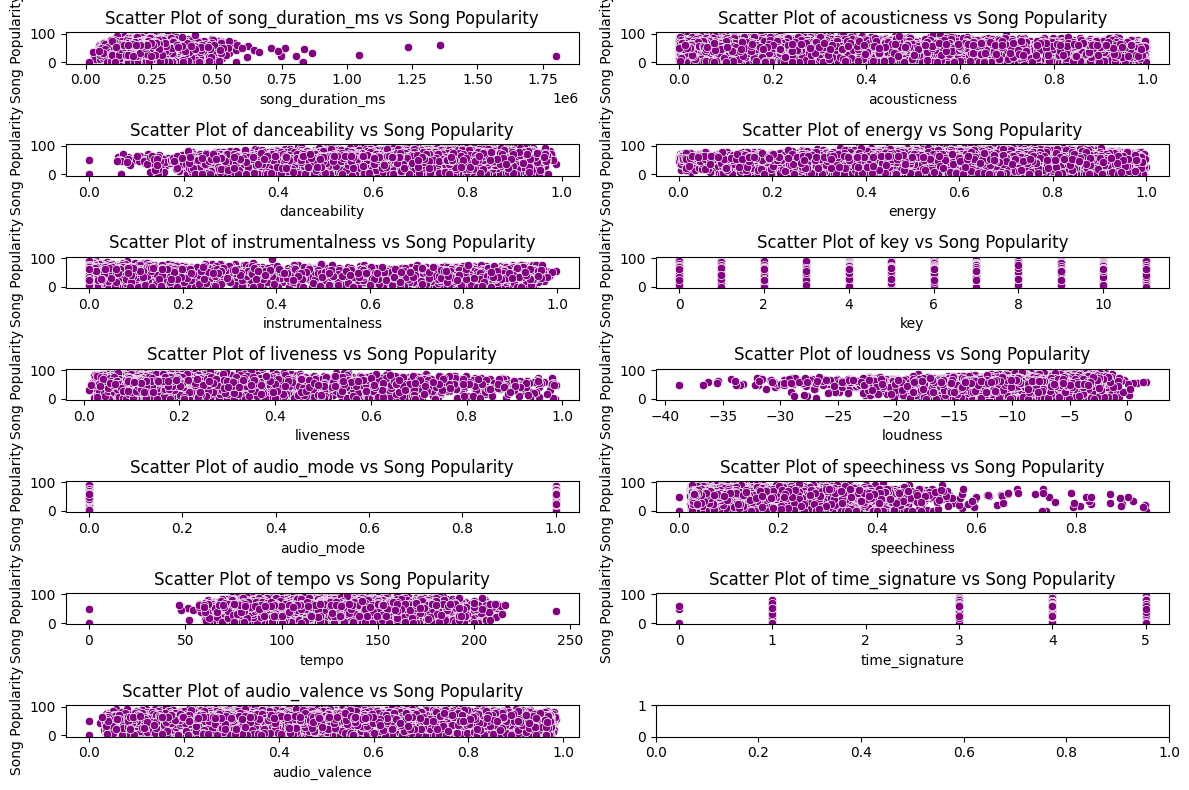

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mendefinisikan dataset numerik dan kategorikal
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Menentukan jumlah baris dan kolom untuk subplot
rows = int((len(numerical_columns) - 1) / 2) + 1  # Membulatkan ke atas
cols = 2

# Membuat figure dan mengatur layout
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))  # Menyesuaikan ukuran sesuai keinginan

# Iterasi untuk membuat scatter plot pada setiap subplot
current_ax = 0
for column in numerical_columns:
  if column != 'song_popularity':
    # Akses subplot berdasarkan indeks
    ax = axes.flat[current_ax]
    sns.scatterplot(x=df[column], y=df['song_popularity'], color="purple", ax=ax)
    ax.set_title(f"Scatter Plot of {column} vs Song Popularity")
    ax.set_xlabel(column)
    ax.set_ylabel("Song Popularity")
    current_ax += 1

# Menyesuaikan jarak subplot (opsional)
plt.tight_layout()

plt.show()

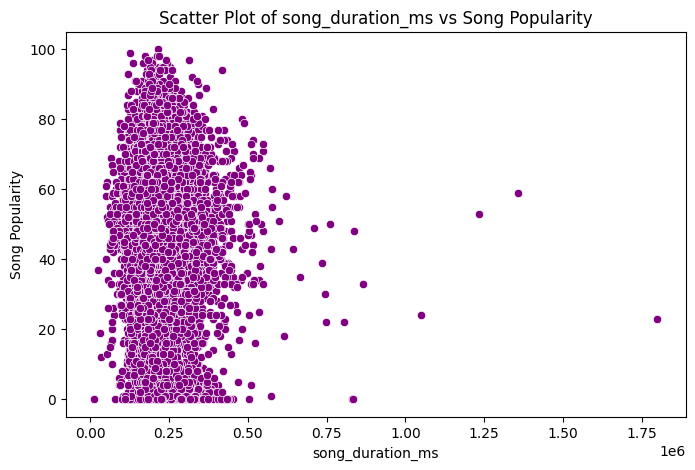

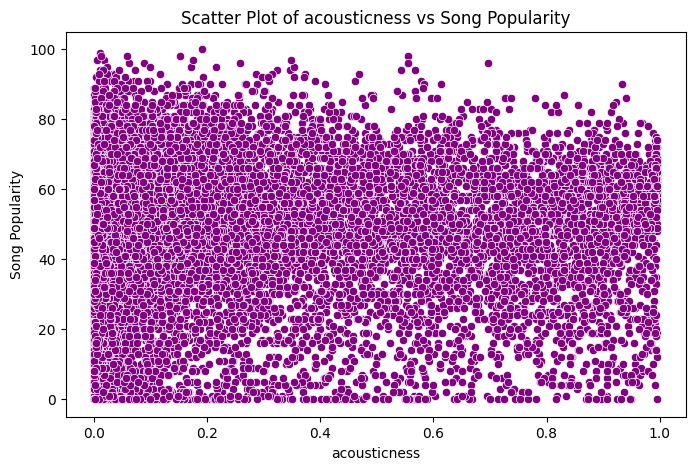

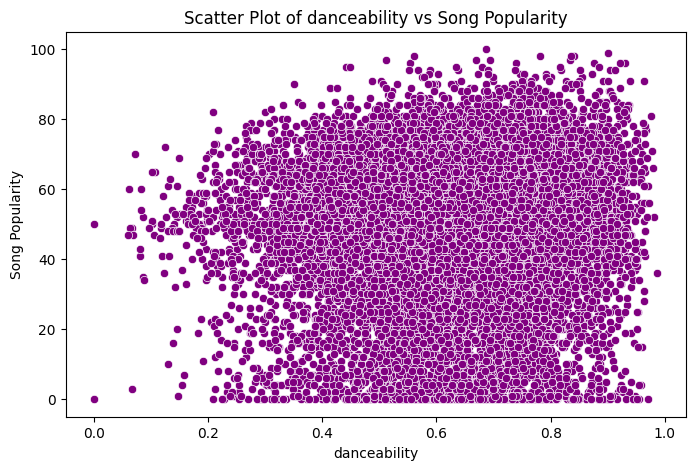

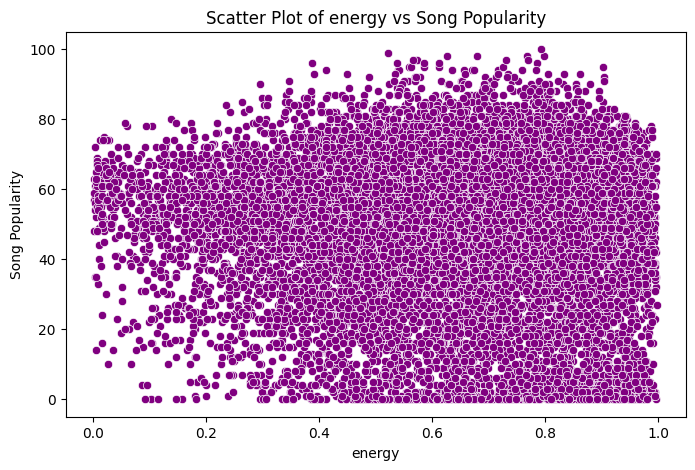

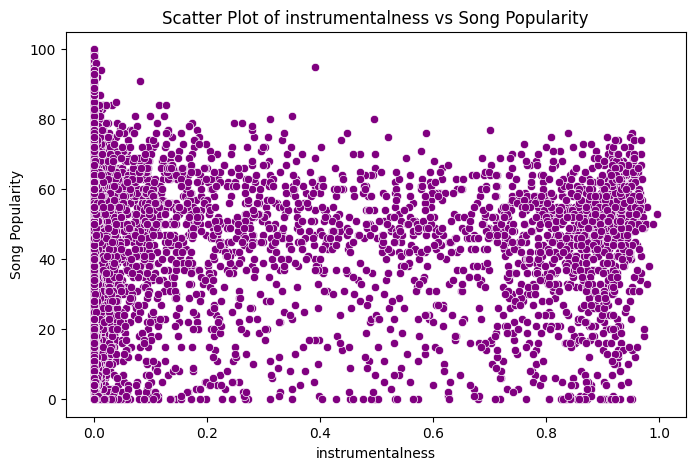

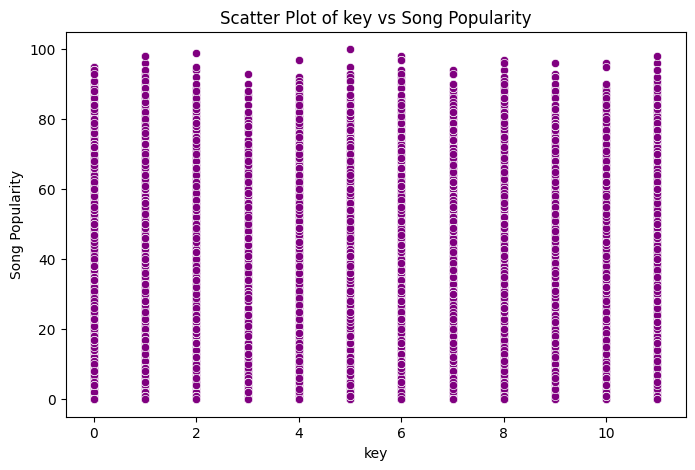

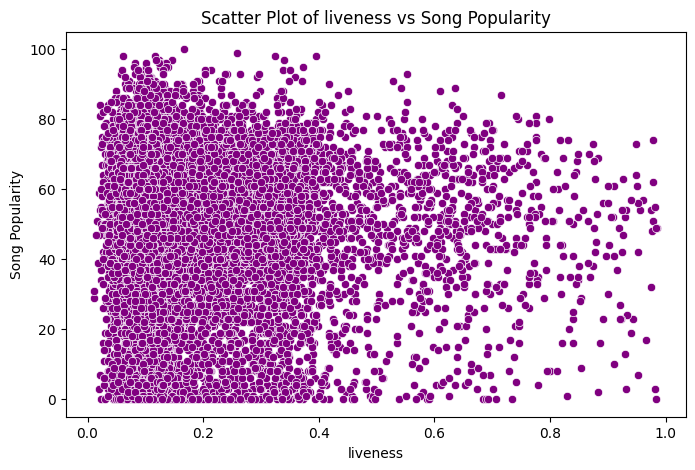

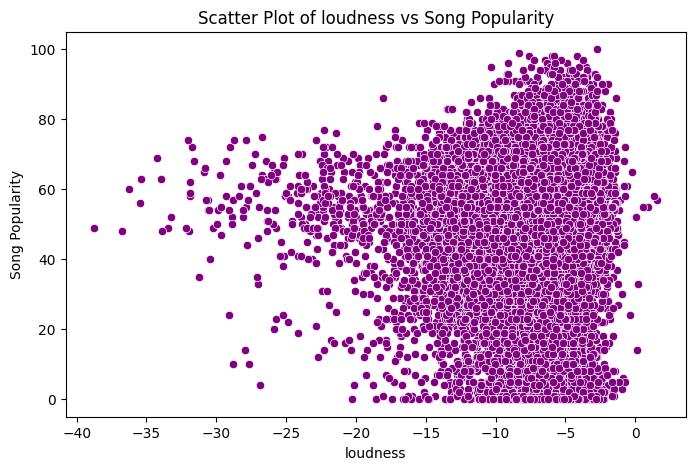

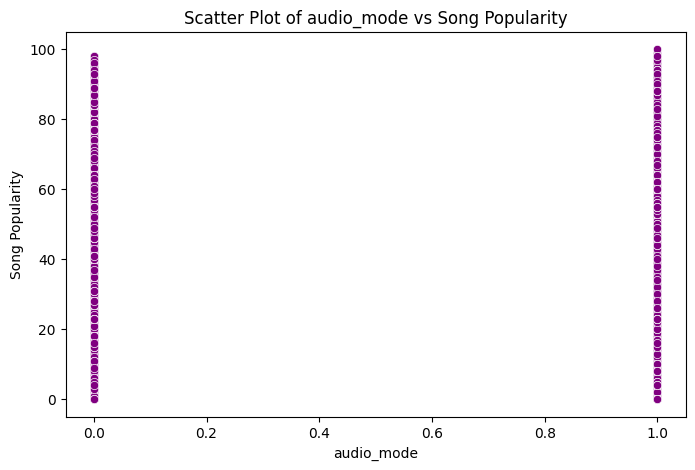

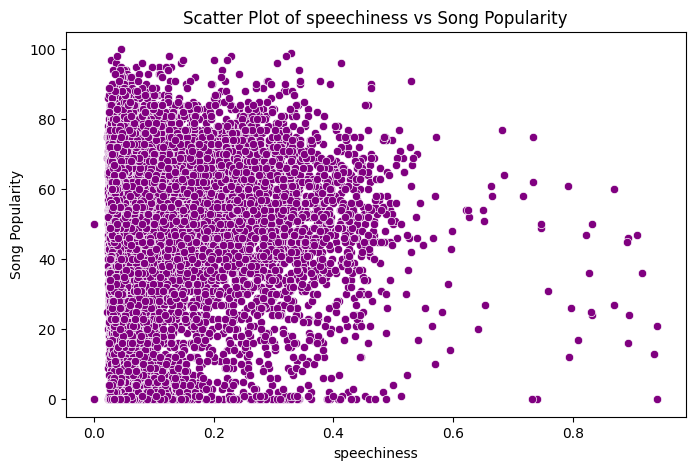

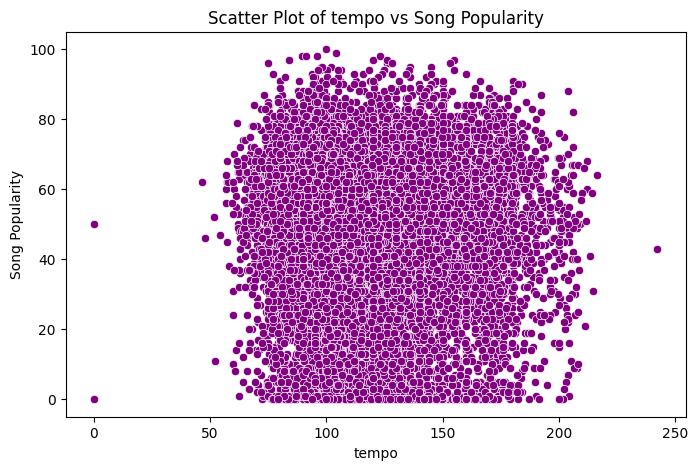

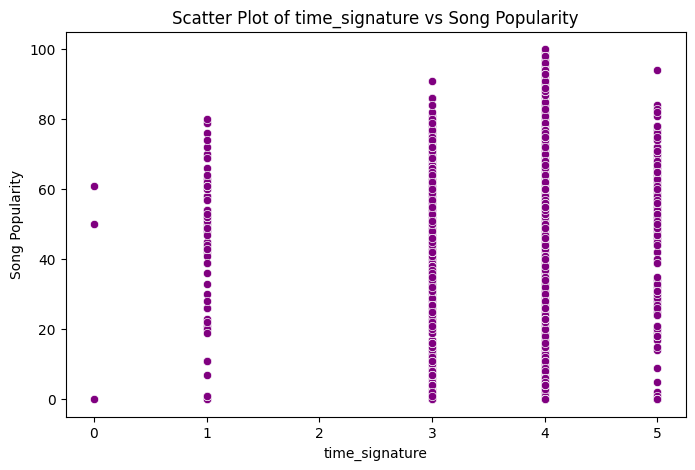

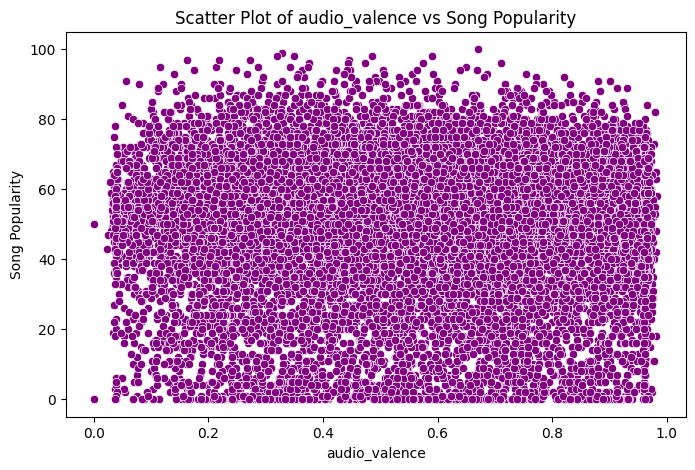

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mendefinisikan dataset numerik dan kategorikal
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Visualisasi perbandingan setiap kolom numerik dengan song_popularity menggunakan scatter plot
for column in numerical_columns:
    if column != 'song_popularity':
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[column], y=df['song_popularity'], color="purple")
        plt.title(f"Scatter Plot of {column} vs Song Popularity")
        plt.xlabel(column)
        plt.ylabel("Song Popularity")
        plt.show()



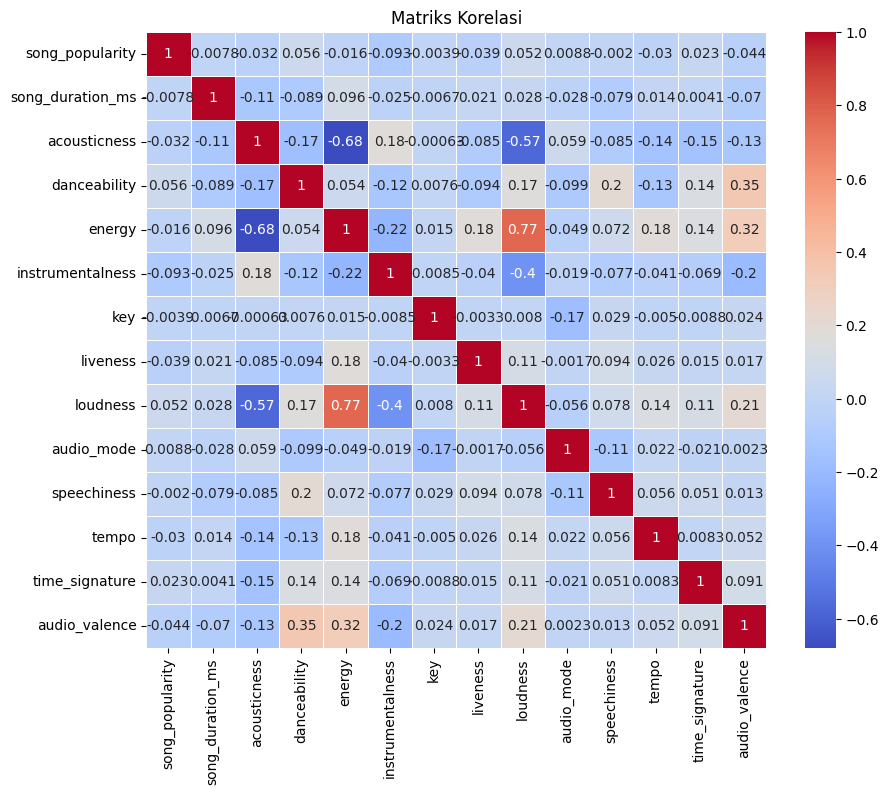

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

Visualisasi-visualisasi diatas merupakan keterikatan setiap kolom independed dengan kolom dependen. Dapat dilihat bahwa tidak ada kolom yang menunujukkan adanya trend dengan kolom dependen. Dan juga dapat dilihat nilai korelasi antara kolom independen dan dependen yang tidak menunjukkan adanya korelasi yang kuat.

# Distribusi Setiap Kolom

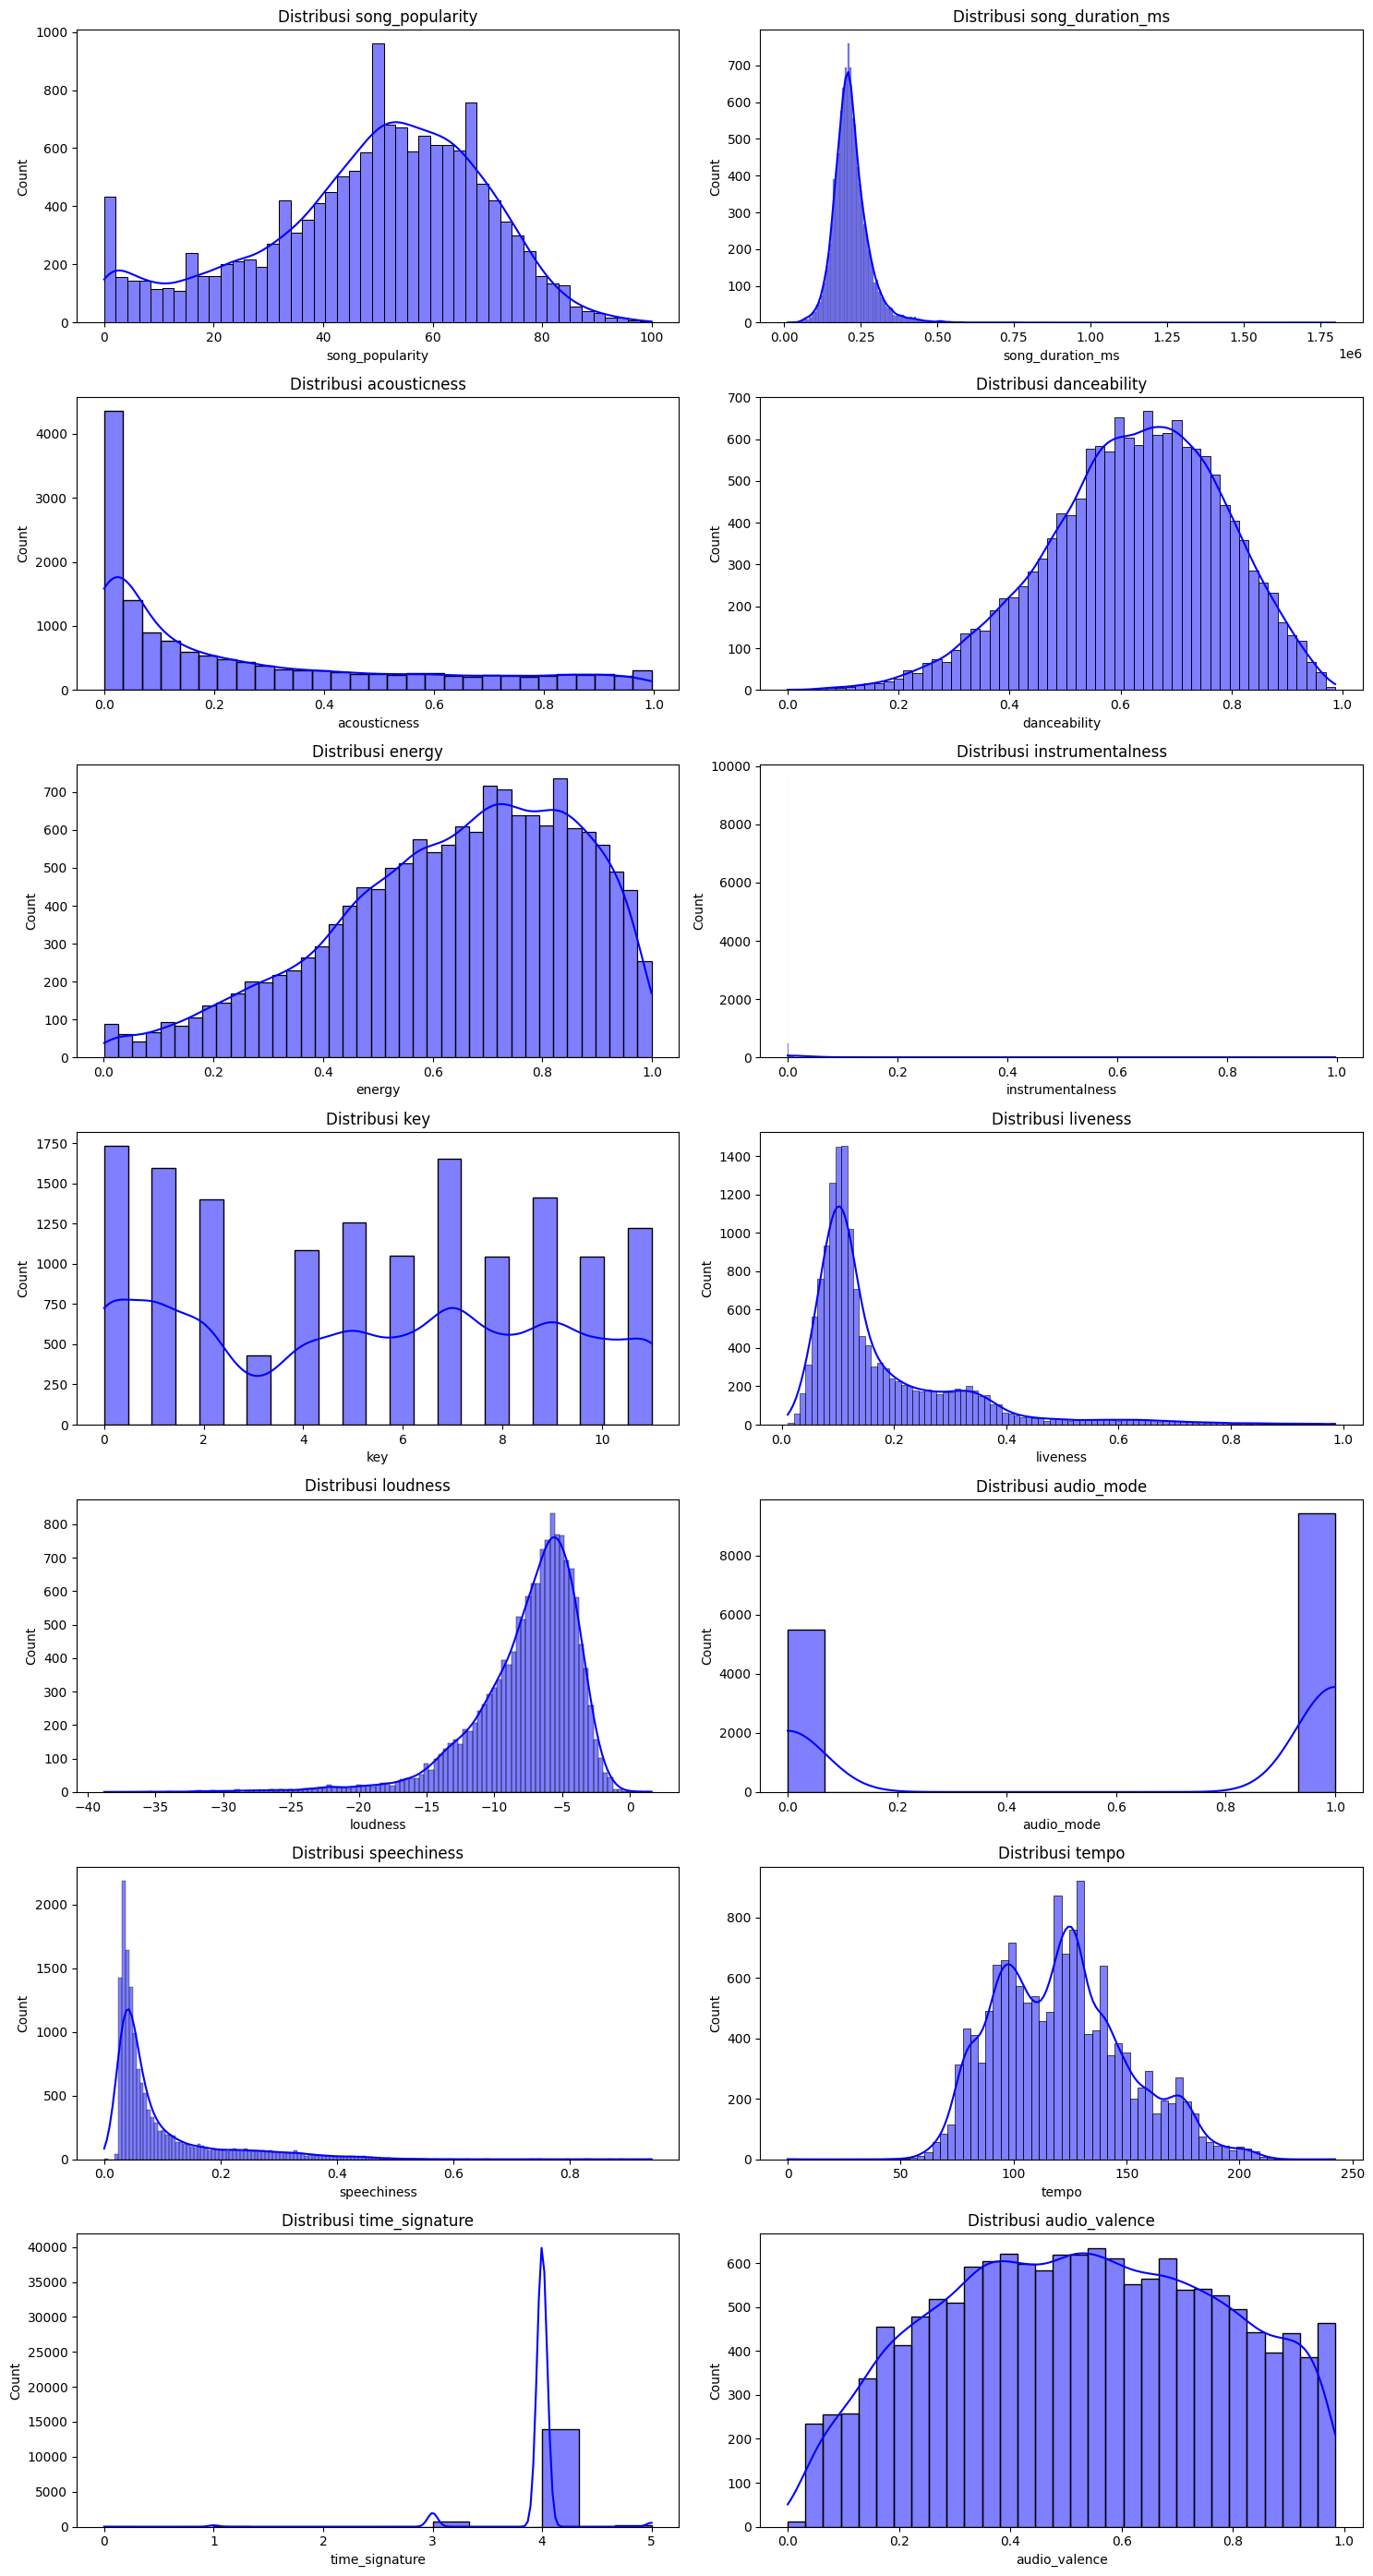

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Identifikasi kolom numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Hitung jumlah kolom dan tentukan ukuran grid
num_columns = len(numerical_columns)
cols = 2  # Tentukan jumlah kolom per baris
rows = math.ceil(num_columns / cols)  # Tentukan jumlah baris

# Membuat figure untuk visualisasi
fig, axs = plt.subplots(rows, cols, figsize=(15, rows * 4))
axs = axs.flatten()  # Mengubah grid menjadi array untuk iterasi

# Plot distribusi untuk setiap kolom numerik
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axs[i], color="blue")
    axs[i].set_title(f'Distribusi {column}')
    axs[i].set_xlabel(column)

# Hapus subplot kosong jika jumlah kolom tidak genap
for j in range(len(numerical_columns), len(axs)):
    fig.delaxes(axs[j])

# Tampilkan plot
plt.tight_layout()
plt.show()


Text(0.5, 0, 'Durasi (menit)')

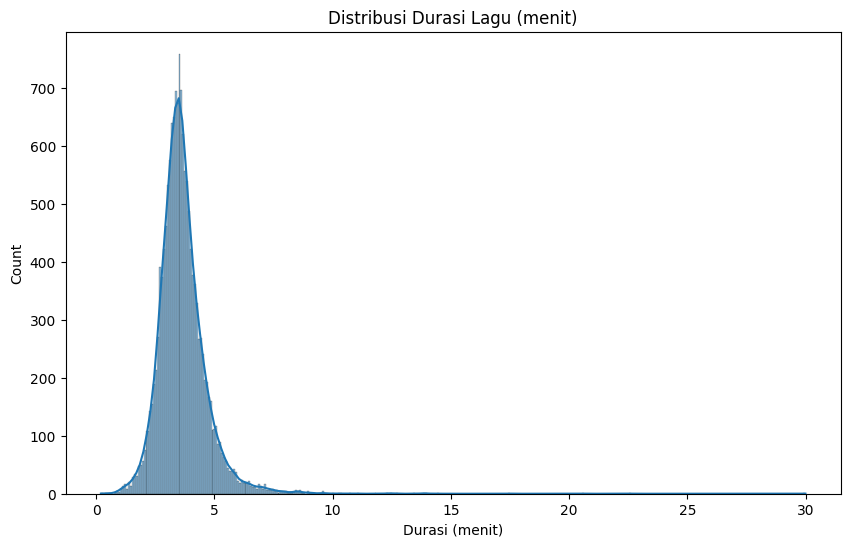

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))  # Ukuran disesuaikan
sns.histplot(df['song_duration_ms'] / 60000, kde=True, ax=ax)
ax.set_title('Distribusi Durasi Lagu (menit)')
ax.set_xlabel('Durasi (menit)')

# Mengecek Penyebaran Data dengan BoxPlot


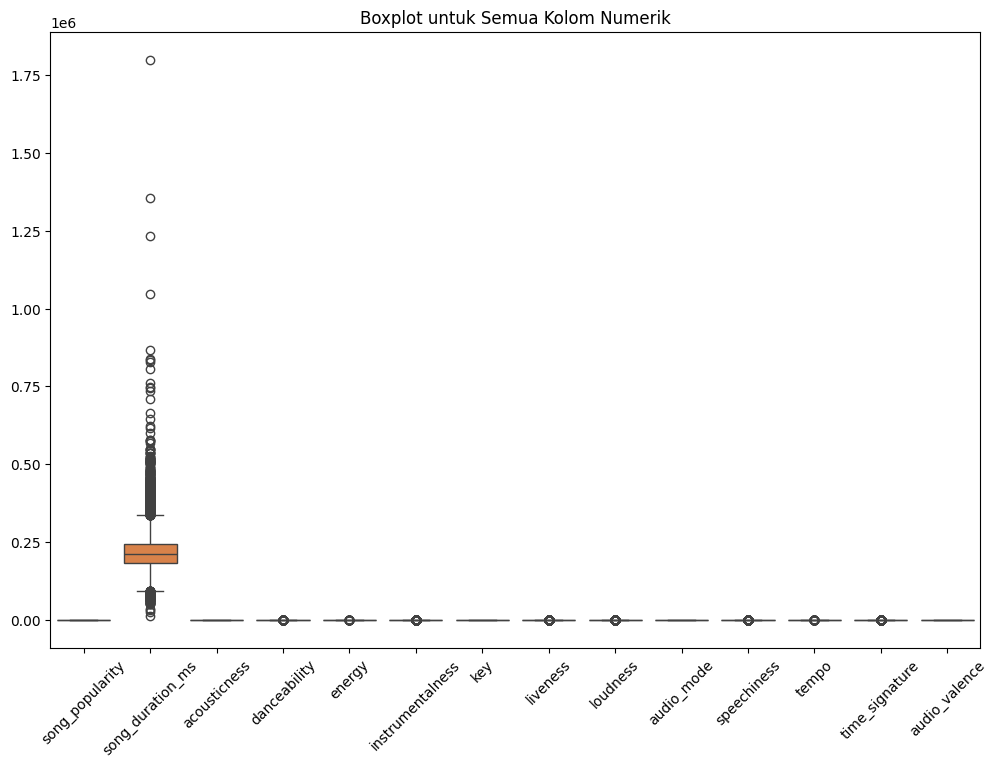

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot untuk Semua Kolom Numerik')
plt.show()

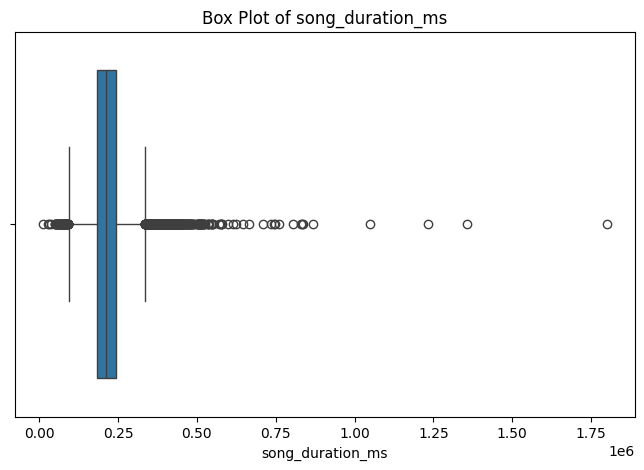

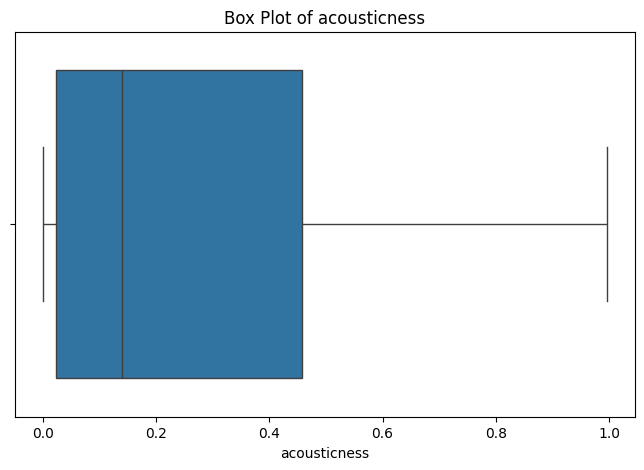

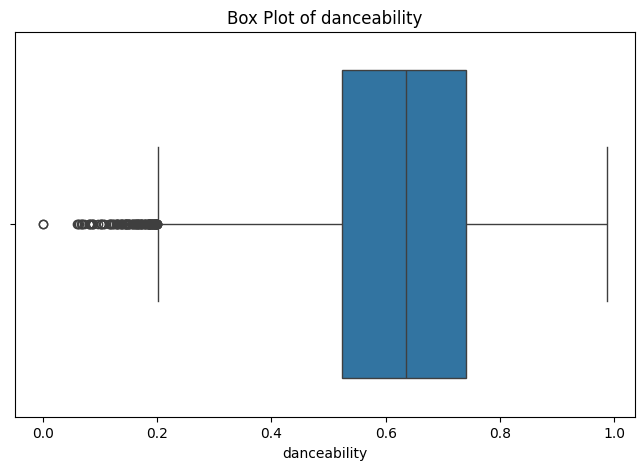

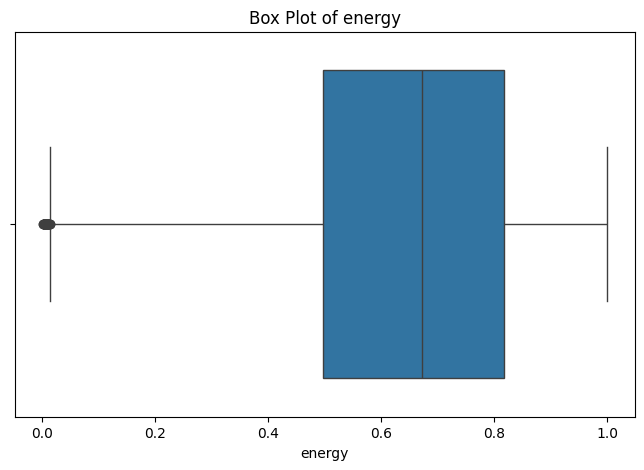

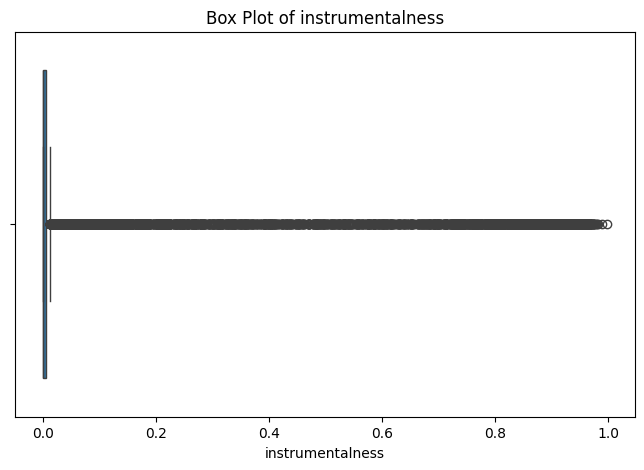

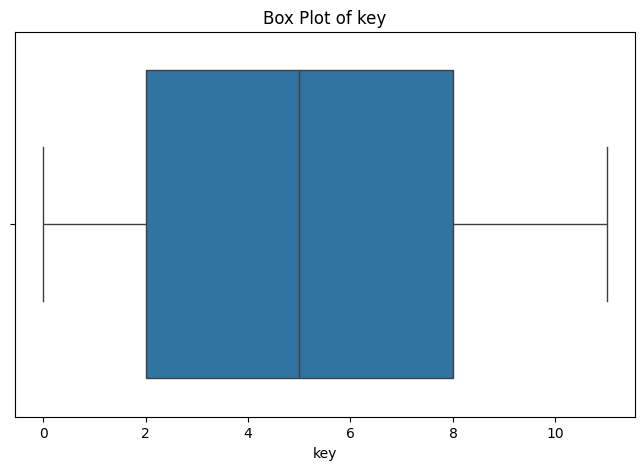

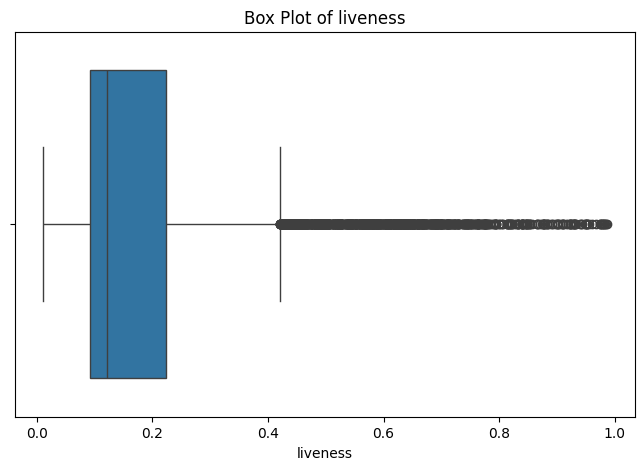

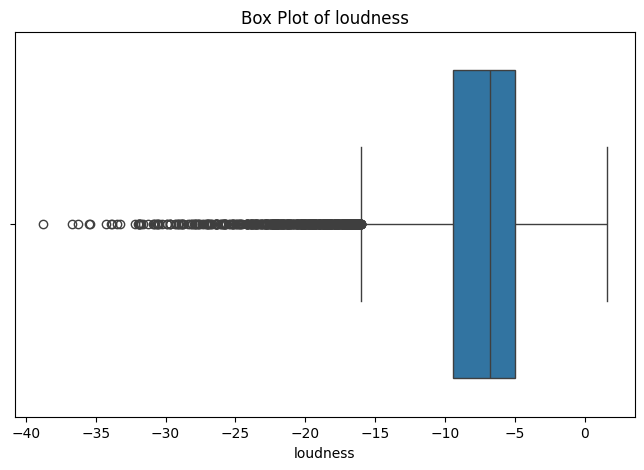

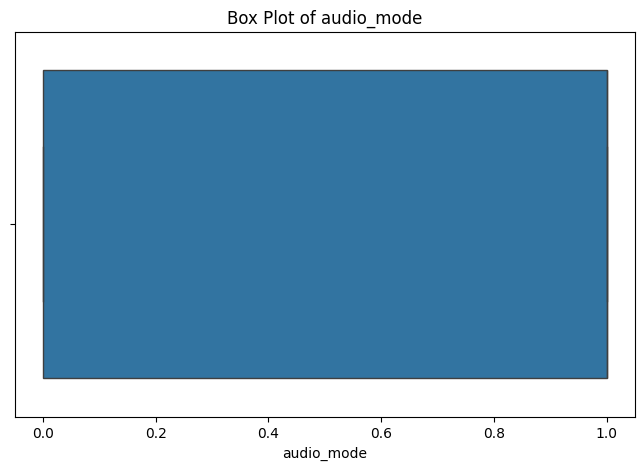

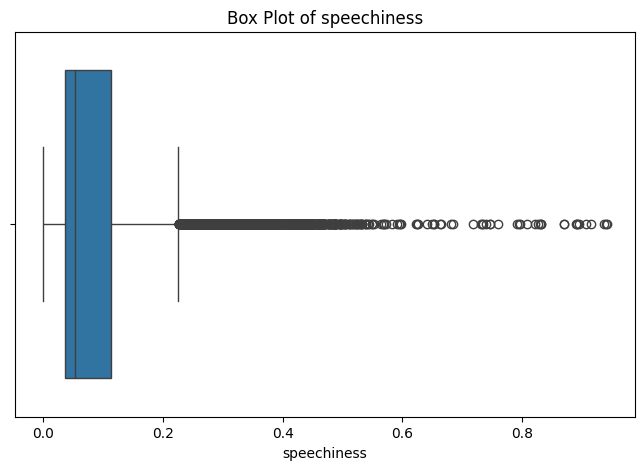

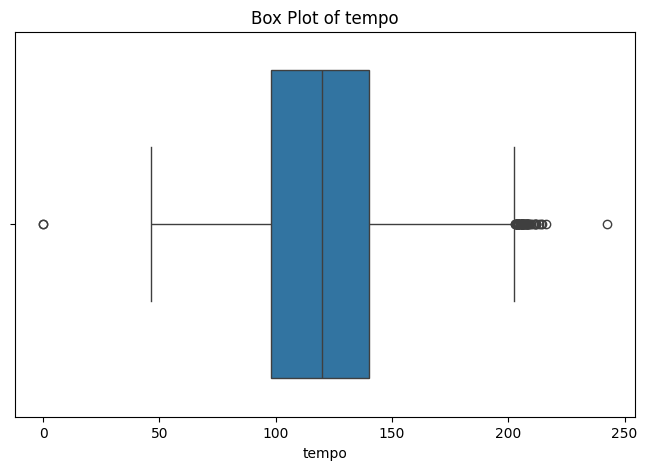

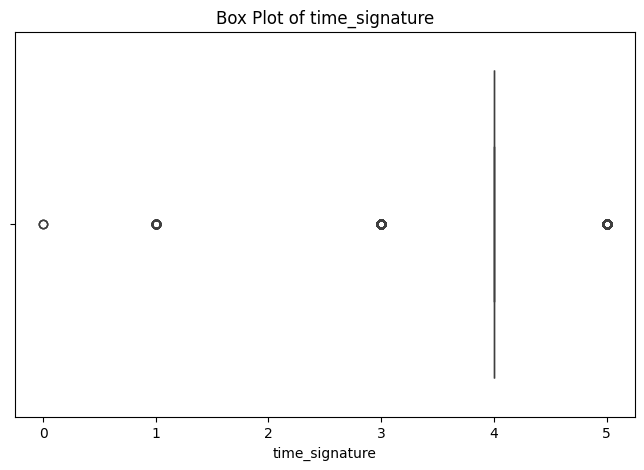

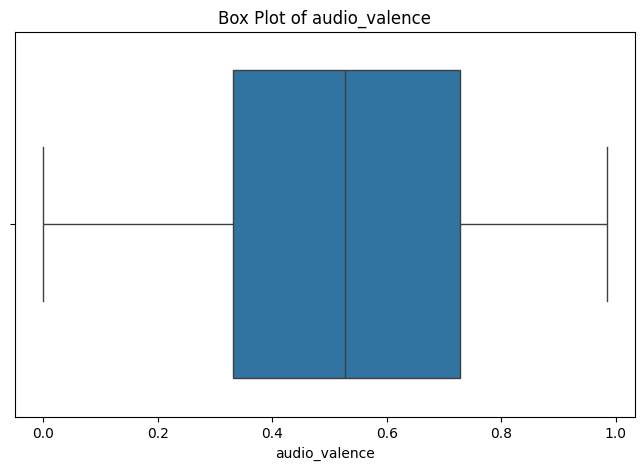

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengidentifikasi kolom numerik selain 'song_popularity'
numerical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'song_popularity']

# Membuat boxplot untuk setiap kolom numerik
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.show()



Dari visualisasi diatas didapatkan sangat banyak kolom yang memiliki banyak outlier seperti song_duration_ms, danceability, energy,instrumentalness, liveness, loudness, speechiness, tempo, time_signature. Oleh karena itu dipertimbangkan penggunaan robustscaler sebelum pelatihan.

In [ ]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

# Top 5 Lagu terpopuler

<ipython-input-28-452903e44864>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='song_popularity', y='song_name', data=top_5_popular_songs, palette='magma')


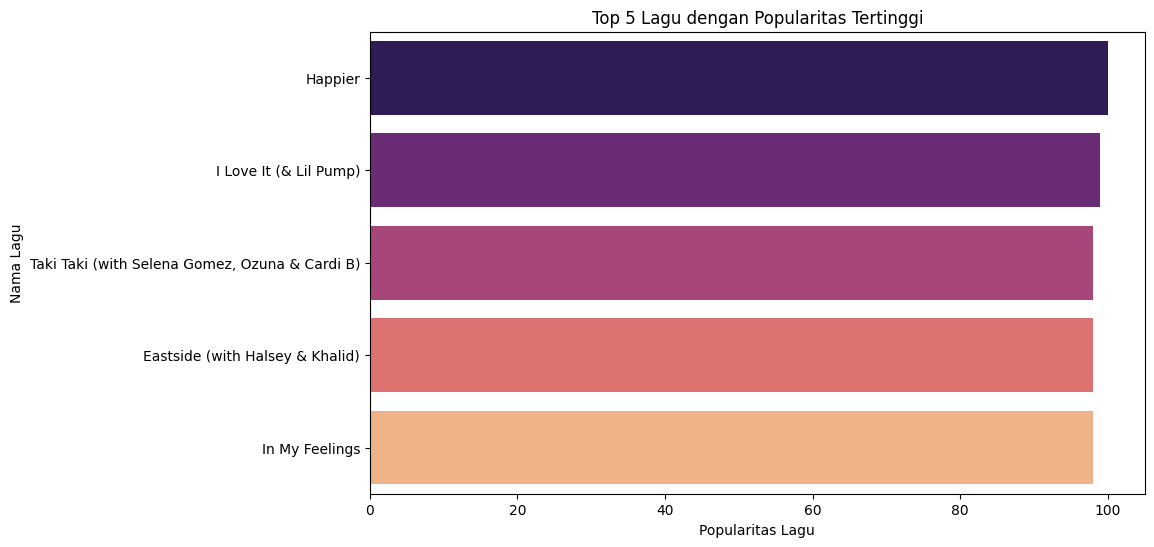

In [ ]:
# Mengambil 5 lagu dengan popularitas tertinggi
top_5_popular_songs = df.sort_values(by='song_popularity', ascending=False).head(5)[['song_name', 'song_popularity']]


# Visualisasi Top 5 Lagu dengan Popularitas Tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(x='song_popularity', y='song_name', data=top_5_popular_songs, palette='magma')
plt.title('Top 5 Lagu dengan Popularitas Tertinggi')
plt.xlabel('Popularitas Lagu')
plt.ylabel('Nama Lagu')
plt.show()

In [ ]:
most_popular_song = df.sort_values('song_popularity', ascending=False).head(5)
most_popular_song

song_name  song_popularity  \
4299                                         Happier              100   
1229                          I Love It (& Lil Pump)               99   
61    Taki Taki (with Selena Gomez, Ozuna & Cardi B)               98   
4302                 Eastside (with Halsey & Khalid)               98   
7584                                  In My Feelings               98   

      song_duration_ms  acousticness  danceability  energy  instrumentalness  \
4299            214289        0.1910         0.687   0.792          0.000000   
1229            127946        0.0114         0.901   0.522          0.000000   
61              212500        0.1530         0.841   0.798          0.000003   
4302            173799        0.5550         0.560   0.680          0.000000   
7584            217925        0.0589         0.835   0.626          0.000060   

      key  liveness  loudness  audio_mode  speechiness    tempo  \
4299    5    0.1670    -2.749           1       0.0452  100.015   
1229    2    0.2590    -8.304           1       0.3300  104.053   
61      1    0.0618    -4.206           0       0.2290   95.948   
4302    6    0.1160    -7.648           0       0.3210   89.391   
7584    1    0.3960    -5.833           1       0.1250   91.030   

      time_signature  audio_valence  
4299               4          0.671  
1229               4          0.329  
61                 4          0.591  
4302               4          0.319  
7584               4          0.350



*   Happier – Marshmello & Bastille (2018)
*   I Love It – Kanye West & Lil Pump (2018)
*   Taki Taki – DJ Snake, Selena Gomez, Ozuna & Cardi B (2018)
*   Eastside – Benny Blanco, Halsey & Khalid (2018)
*   In My Feelings – Drake (2018)









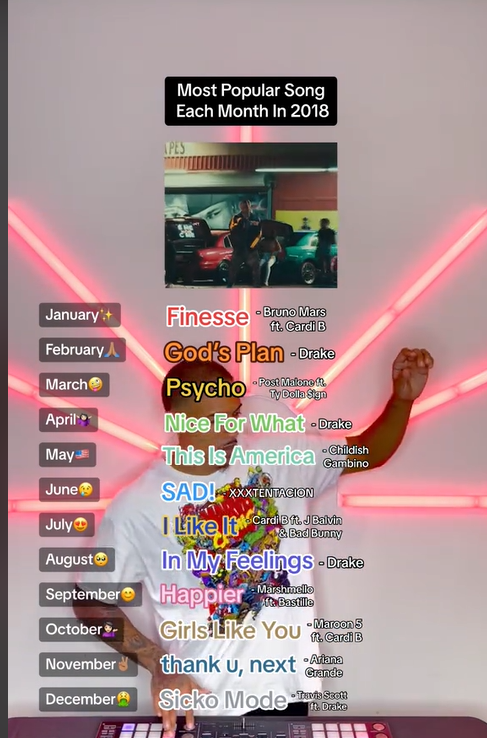

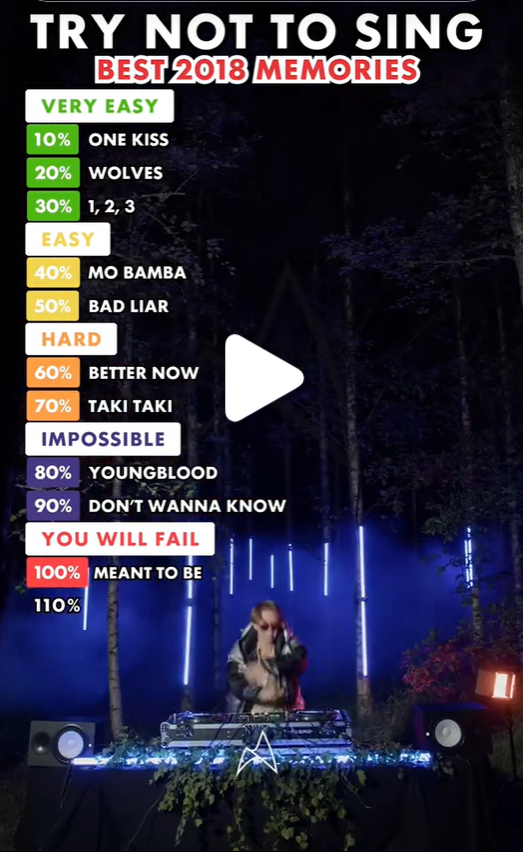

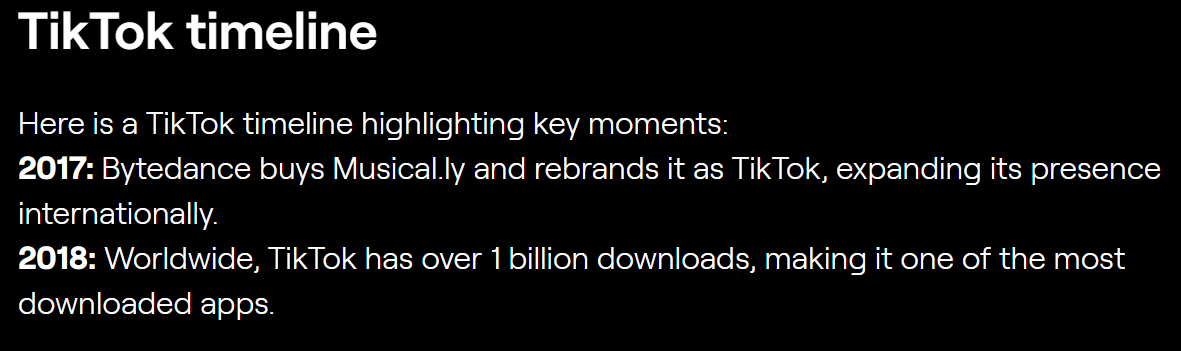

Jika dilihat dari 5 lagu paling populer tahun rilis dari 5 lagu tersebut semuannya sama yaitu ditahun 2018. Dan beberapa dari 5 lagu tersebut berdasarkan sumber dari tiktok merupakan lagu-lagu yang populer pada tahun 2018 selaras dengan suatu artikel dari Grin yang berjudul "The History of TikTok and Where It’s Going" menyatakan adanya lonjakan user tiktok pada tahun 2018.

#Modelling

##Data Preparation

###First Finding

In [ ]:
num_col=['song_duration_ms']
num_col=num_col+(df.select_dtypes(include=['float']).columns.tolist())
num_col

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'audio_valence']

In [ ]:
cat_col=[]
for i in df.drop(['song_name','song_popularity'], axis='columns').columns:
  if i in num_col:
    continue
  else:
    cat_col.append(i)
cat_col

['key', 'audio_mode', 'time_signature']

Asumsi sementara: 'key' dan 'time_signature' adalah ordinal dan 'audio_model' adalah nominal

In [ ]:
ordinal_col=['key','time_signature']
nominal_col=['audio_mode']


In [ ]:
def count_outliers(df): #metodenya boxplot (IQR)
    outliers_count = {}
    for col in df.drop(['song_name'], axis='columns').select_dtypes(include=['float', 'int']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah outlier
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers_count[col] = outliers

    return outliers_count

# Menghitung jumlah outlier di setiap kolom
outliers_per_column = count_outliers(df)

In [ ]:
def kolgomorov(df,alpha):
  p_value={}
  result={}
  for i in df:
    if (i in num_col) or (i=='song_popularity'):
      p_value_temp = kstest(df[i], 'norm', args=(np.mean(df[i]), np.std(df[i])))[1]
      p_value[i]=p_value_temp
      if p_value_temp>alpha:
        result[i]=('Kolom Berdistribusi Normal')
      else:
        result[i]=('Kolom TIDAK Berdistribusi Normal')
    else:
      p_value[i]=('Data Kategorikal')
      result[i]='Data Kategorikal'
  return p_value,result

p_value,kol_result=kolgomorov(df.drop(['song_name'], axis='columns'),0.05)

In [ ]:
finding=pd.DataFrame({'Kolom':df.drop(['song_name'], axis='columns').select_dtypes(include=['float', 'int']).columns})
tmp=[]
for i in df.drop(['song_name'], axis='columns').select_dtypes(include=['float', 'int']).columns:
  if i in num_col:
    tmp.append('Kontinu')
  elif i in ordinal_col:
    tmp.append('Ordinal')
  else:
    tmp.append('Nominal')
finding['Tipe Data']=tmp
finding['Jumlah Oulier Sebelum Transformasi']=outliers_per_column.values()
finding['P Value Kolgomorov Sebelum Transformasi']=p_value.values()
finding['Distribusi Kolom Sebelum Transformasi']=kol_result.values()
finding



Kolom Tipe Data  Jumlah Oulier Sebelum Transformasi  \
0    song_popularity   Nominal                                   0   
1   song_duration_ms   Kontinu                                 643   
2       acousticness   Kontinu                                   0   
3       danceability   Kontinu                                 111   
4             energy   Kontinu                                  45   
5   instrumentalness   Kontinu                                3212   
6                key   Ordinal                                   0   
7           liveness   Kontinu                                 935   
8           loudness   Kontinu                                 564   
9         audio_mode   Nominal                                   0   
10       speechiness   Kontinu                                1821   
11             tempo   Kontinu                                  68   
12    time_signature   Ordinal                                 949   
13     audio_valence   Kontinu                                   0   

   P Value Kolgomorov Sebelum Transformasi  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
5                                      0.0   
6                         Data Kategorikal   
7                                      0.0   
8                                      0.0   
9                         Data Kategorikal   
10                                     0.0   
11                                     0.0   
12                        Data Kategorikal   
13                                     0.0   

   Distribusi Kolom Sebelum Transformasi  
0       Kolom TIDAK Berdistribusi Normal  
1       Kolom TIDAK Berdistribusi Normal  
2       Kolom TIDAK Berdistribusi Normal  
3       Kolom TIDAK Berdistribusi Normal  
4       Kolom TIDAK Berdistribusi Normal  
5       Kolom TIDAK Berdistribusi Normal  
6                       Data Kategorikal  
7       Kolom TIDAK Berdistribusi Normal  
8       Kolom TIDAK Berdistribusi Normal  
9                       Data Kategorikal  
10      Kolom TIDAK Berdistribusi Normal  
11      Kolom TIDAK Berdistribusi Normal  
12                      Data Kategorikal  
13      Kolom TIDAK Berdistribusi Normal

###Outlier Handling

In [ ]:
df.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     14926.000000      1.492600e+04  14926.000000  14926.000000   
mean         48.750904      2.189496e+05      0.270453      0.624514   
std          20.379465      6.234080e+04      0.298117      0.158081   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          37.000000      1.839435e+05      0.023600      0.524000   
50%          52.000000      2.118455e+05      0.139000      0.636000   
75%          63.750000      2.447200e+05      0.458000      0.740000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  14926.000000      14926.000000  14926.000000  14926.000000   
mean       0.639763          0.092067      5.301152      0.180435   
std        0.221756          0.240451      3.592616      0.145097   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.496000          0.000000      2.000000      0.093000   
50%        0.672000          0.000021      5.000000      0.122000   
75%        0.818000          0.005105      8.000000      0.224000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  14926.000000  14926.000000  14926.000000  14926.000000    14926.000000   
mean      -7.677232      0.631917      0.099419    121.105007        3.952968   
std        4.018670      0.482300      0.103546     29.044644        0.316702   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.389500      0.000000      0.037200     98.125000        4.000000   
50%       -6.750500      1.000000      0.054100    120.016000        4.000000   
75%       -4.991000      1.000000      0.113000    139.940750        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   14926.000000  
mean        0.526967  
std         0.247758  
min         0.000000  
25%         0.332000  
50%         0.527000  
75%         0.727750  
max         0.984000

Asumsi sementara, karena tidak ada penjelasan lengkap terkait datanya, oleh karena itu sementara outlier dianggap sebagai data yang benar, handling akan dilakukan oleh robust scaler

In [ ]:
df_cleaned=df.copy()

####Alternatif paling cepet

In [ ]:
#Menghapus  Baris Outlier

exclude_column = 'time_signature'

columns_to_check = [col for col in df.drop(['song_name'], axis='columns').columns if col != exclude_column]


Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).any(axis=1)]

def count_outliers_cleaned(df,df_cleaned): #metodenya boxplot (IQR)
    outliers_count = {}
    for col in df.drop(['song_name'], axis='columns').select_dtypes(include=['float', 'int']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah outlier
        outliers = ((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)).sum()
        outliers_count[col] = outliers

    return outliers_count



outliers_per_column_clean = count_outliers(df_cleaned)
p_value_clean, kol_result_clean=kolgomorov(df_cleaned.drop(['song_name'], axis='columns'),0.05)

finding['Jumlah Oulier Setelah Pembersihan']=outliers_per_column_clean.values()
finding['P Value Kolgomorov Setelah Pembersihan']=p_value_clean.values()
finding['Distribusi Kolom Setelah Pembersihan']=kol_result_clean.values()
finding

Kolom Tipe Data  Jumlah Oulier Sebelum Transformasi  \
0    song_popularity   Nominal                                   0   
1   song_duration_ms   Kontinu                                 643   
2       acousticness   Kontinu                                   0   
3       danceability   Kontinu                                 111   
4             energy   Kontinu                                  45   
5   instrumentalness   Kontinu                                3212   
6                key   Ordinal                                   0   
7           liveness   Kontinu                                 935   
8           loudness   Kontinu                                 564   
9         audio_mode   Nominal                                   0   
10       speechiness   Kontinu                                1821   
11             tempo   Kontinu                                  68   
12    time_signature   Ordinal                                 949   
13     audio_valence   Kontinu                                   0   

   P Value Kolgomorov Sebelum Transformasi  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
5                                      0.0   
6                         Data Kategorikal   
7                                      0.0   
8                                      0.0   
9                         Data Kategorikal   
10                                     0.0   
11                                     0.0   
12                        Data Kategorikal   
13                                     0.0   

   Distribusi Kolom Sebelum Transformasi  Jumlah Oulier Setelah Pembersihan  \
0       Kolom TIDAK Berdistribusi Normal                                  0   
1       Kolom TIDAK Berdistribusi Normal                                119   
2       Kolom TIDAK Berdistribusi Normal                                  0   
3       Kolom TIDAK Berdistribusi Normal                                 34   
4       Kolom TIDAK Berdistribusi Normal                                 13   
5       Kolom TIDAK Berdistribusi Normal                               1755   
6                       Data Kategorikal                                  0   
7       Kolom TIDAK Berdistribusi Normal                                403   
8       Kolom TIDAK Berdistribusi Normal                                160   
9                       Data Kategorikal                                  0   
10      Kolom TIDAK Berdistribusi Normal                                745   
11      Kolom TIDAK Berdistribusi Normal                                 50   
12                      Data Kategorikal                                473   
13      Kolom TIDAK Berdistribusi Normal                                  0   

   P Value Kolgomorov Setelah Pembersihan Distribusi Kolom Setelah Pembersihan  
0                                     0.0     Kolom TIDAK Berdistribusi Normal  
1                                     0.0     Kolom TIDAK Berdistribusi Normal  
2                                     0.0     Kolom TIDAK Berdistribusi Normal  
3                                0.000002     Kolom TIDAK Berdistribusi Normal  
4                                     0.0     Kolom TIDAK Berdistribusi Normal  
5                                     0.0     Kolom TIDAK Berdistribusi Normal  
6                        Data Kategorikal                     Data Kategorikal  
7                                     0.0     Kolom TIDAK Berdistribusi Normal  
8                                     0.0     Kolom TIDAK Berdistribusi Normal  
9                        Data Kategorikal                     Data Kategorikal  
10                                    0.0     Kolom TIDAK Berdistribusi Normal  
11                                    0.0     Kolom TIDAK Berdistribusi Normal  
12                       Data Kate

###Splitting for tinkering with preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('song_popularity', axis='columns'),df_cleaned['song_popularity'],
                                                    test_size = 0.2,
                                                    random_state = 0)

train=pd.concat([X_train, y_train], axis=1)

p_value,kol_result=kolgomorov(train.drop(['song_name'], axis='columns'),0.05)

finding_t=pd.DataFrame({'Kolom':df.drop(['song_name'], axis='columns').select_dtypes(include=['float', 'int']).columns})
tmp=[]
for i in df.drop(['song_name'], axis='columns').select_dtypes(include=['float', 'int']).columns:
  if i in num_col:
    tmp.append('Kontinu')
  elif i in ordinal_col:
    tmp.append('Ordinal')
  else:
    tmp.append('Nominal')
finding_t['Tipe Data']=tmp
finding_t['P Value Kolgomorov Sebelum Transformasi']=p_value.values()
finding_t['Distribusi Kolom Sebelum Transformasi']=kol_result.values()
finding_t

Kolom Tipe Data P Value Kolgomorov Sebelum Transformasi  \
0    song_popularity   Nominal                                     0.0   
1   song_duration_ms   Kontinu                                     0.0   
2       acousticness   Kontinu                                0.000009   
3       danceability   Kontinu                                     0.0   
4             energy   Kontinu                                     0.0   
5   instrumentalness   Kontinu                        Data Kategorikal   
6                key   Ordinal                                     0.0   
7           liveness   Kontinu                                     0.0   
8           loudness   Kontinu                        Data Kategorikal   
9         audio_mode   Nominal                                     0.0   
10       speechiness   Kontinu                                     0.0   
11             tempo   Kontinu                        Data Kategorikal   
12    time_signature   Ordinal                                     0.0   
13     audio_valence   Kontinu                                     0.0   

   Distribusi Kolom Sebelum Transformasi  
0       Kolom TIDAK Berdistribusi Normal  
1       Kolom TIDAK Berdistribusi Normal  
2       Kolom TIDAK Berdistribusi Normal  
3       Kolom TIDAK Berdistribusi Normal  
4       Kolom TIDAK Berdistribusi Normal  
5                       Data Kategorikal  
6       Kolom TIDAK Berdistribusi Normal  
7       Kolom TIDAK Berdistribusi Normal  
8                       Data Kategorikal  
9       Kolom TIDAK Berdistribusi Normal  
10      Kolom TIDAK Berdistribusi Normal  
11                      Data Kategorikal  
12      Kolom TIDAK Berdistribusi Normal  
13      Kolom TIDAK Berdistribusi Normal

###Cek pengaruh Transformation
Untuk mendekatkan distribusi kolom numerik ke distribusi normal

In [ ]:
#BOX COX

from scipy.special import boxcox1p

df_tf_bc = train.copy()
lam=0.5
for feat in ['song_popularity']+num_col:
  df_tf_bc[feat]=boxcox1p(df_tf_bc[feat],lam)

p_value_trans,kol_result_trans=kolgomorov(df_tf_bc.drop(['song_name'], axis='columns'),0.05)

finding_t['P Value Kolgomorov Setelah Transformasi']=p_value_trans.values()
finding_t['Distribusi Kolom Setelah Transformasi']=kol_result_trans.values()
finding_t

Kolom Tipe Data P Value Kolgomorov Sebelum Transformasi  \
0    song_popularity   Nominal                                     0.0   
1   song_duration_ms   Kontinu                                     0.0   
2       acousticness   Kontinu                                0.000009   
3       danceability   Kontinu                                     0.0   
4             energy   Kontinu                                     0.0   
5   instrumentalness   Kontinu                        Data Kategorikal   
6                key   Ordinal                                     0.0   
7           liveness   Kontinu                                     0.0   
8           loudness   Kontinu                        Data Kategorikal   
9         audio_mode   Nominal                                     0.0   
10       speechiness   Kontinu                                     0.0   
11             tempo   Kontinu                        Data Kategorikal   
12    time_signature   Ordinal                                     0.0   
13     audio_valence   Kontinu                                     0.0   

   Distribusi Kolom Sebelum Transformasi  \
0       Kolom TIDAK Berdistribusi Normal   
1       Kolom TIDAK Berdistribusi Normal   
2       Kolom TIDAK Berdistribusi Normal   
3       Kolom TIDAK Berdistribusi Normal   
4       Kolom TIDAK Berdistribusi Normal   
5                       Data Kategorikal   
6       Kolom TIDAK Berdistribusi Normal   
7       Kolom TIDAK Berdistribusi Normal   
8                       Data Kategorikal   
9       Kolom TIDAK Berdistribusi Normal   
10      Kolom TIDAK Berdistribusi Normal   
11                      Data Kategorikal   
12      Kolom TIDAK Berdistribusi Normal   
13      Kolom TIDAK Berdistribusi Normal   

   P Value Kolgomorov Setelah Transformasi  \
0                                 0.000917   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
5                         Data Kategorikal   
6                                      0.0   
7                                      NaN   
8                         Data Kategorikal   
9                                      0.0   
10                                     0.0   
11                        Data Kategorikal   
12                                     0.0   
13                                     0.0   

   Distribusi Kolom Setelah Transformasi  
0       Kolom TIDAK Berdistribusi Normal  
1       Kolom TIDAK Berdistribusi Normal  
2       Kolom TIDAK Berdistribusi Normal  
3       Kolom TIDAK Berdistribusi Normal  
4       Kolom TIDAK Berdistribusi Normal  
5                       Data Kategorikal  
6       Kolom TIDAK Berdistribusi Normal  
7       Kolom TIDAK Berdistribusi Normal  
8                       Data Kategorikal  
9       Kolom TIDAK Berdistribusi Normal  
10      Kolom TIDAK Berdistribusi Normal  
11                      Data Kategorikal  
12      Kolom TIDAK Berdistribusi Normal  
13      Kolom TIDAK Berdistribusi Normal

In [ ]:
#YEO JOHNSON

from sklearn.preprocessing import PowerTransformer

df_tf_yj = train.copy()

transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_data = pd.DataFrame(transformer.fit_transform(df_tf_yj[['song_popularity']+num_col]))
yeo_johnson_data.columns = df_tf_yj[['song_popularity']+num_col].columns.values
yeo_johnson_data.index = df_tf_yj[['song_popularity']+num_col].index.values
df_tf_temp = yeo_johnson_data
for i in df_tf_temp.columns:
  df_tf_yj[i]=df_tf_temp[i]

p_value_trans,kol_result_trans=kolgomorov(df_tf_yj.drop(['song_name'], axis='columns'),0.05)

finding_t['P Value Kolgomorov Setelah Transformasi']=p_value_trans.values()
finding_t['Distribusi Kolom Setelah Transformasi']=kol_result_trans.values()
finding_t

Kolom Tipe Data P Value Kolgomorov Sebelum Transformasi  \
0    song_popularity   Nominal                                     0.0   
1   song_duration_ms   Kontinu                                     0.0   
2       acousticness   Kontinu                                0.000009   
3       danceability   Kontinu                                     0.0   
4             energy   Kontinu                                     0.0   
5   instrumentalness   Kontinu                        Data Kategorikal   
6                key   Ordinal                                     0.0   
7           liveness   Kontinu                                     0.0   
8           loudness   Kontinu                        Data Kategorikal   
9         audio_mode   Nominal                                     0.0   
10       speechiness   Kontinu                                     0.0   
11             tempo   Kontinu                        Data Kategorikal   
12    time_signature   Ordinal                                     0.0   
13     audio_valence   Kontinu                                     0.0   

   Distribusi Kolom Sebelum Transformasi  \
0       Kolom TIDAK Berdistribusi Normal   
1       Kolom TIDAK Berdistribusi Normal   
2       Kolom TIDAK Berdistribusi Normal   
3       Kolom TIDAK Berdistribusi Normal   
4       Kolom TIDAK Berdistribusi Normal   
5                       Data Kategorikal   
6       Kolom TIDAK Berdistribusi Normal   
7       Kolom TIDAK Berdistribusi Normal   
8                       Data Kategorikal   
9       Kolom TIDAK Berdistribusi Normal   
10      Kolom TIDAK Berdistribusi Normal   
11                      Data Kategorikal   
12      Kolom TIDAK Berdistribusi Normal   
13      Kolom TIDAK Berdistribusi Normal   

   P Value Kolgomorov Setelah Transformasi  \
0                                 0.004518   
1                                      0.0   
2                                 0.062166   
3                                      0.0   
4                                      0.0   
5                         Data Kategorikal   
6                                      0.0   
7                                  0.00024   
8                         Data Kategorikal   
9                                      0.0   
10                                     0.0   
11                        Data Kategorikal   
12                                     0.0   
13                                     0.0   

   Distribusi Kolom Setelah Transformasi  
0       Kolom TIDAK Berdistribusi Normal  
1       Kolom TIDAK Berdistribusi Normal  
2             Kolom Berdistribusi Normal  
3       Kolom TIDAK Berdistribusi Normal  
4       Kolom TIDAK Berdistribusi Normal  
5                       Data Kategorikal  
6       Kolom TIDAK Berdistribusi Normal  
7       Kolom TIDAK Berdistribusi Normal  
8                       Data Kategorikal  
9       Kolom TIDAK Berdistribusi Normal  
10      Kolom TIDAK Berdistribusi Normal  
11                      Data Kategorikal  
12      Kolom TIDAK Berdistribusi Normal  
13      Kolom TIDAK Berdistribusi Normal

In [ ]:
trans_result=pd.DataFrame({'Kolom':df.drop(['song_name'], axis='columns').select_dtypes(include=['float', 'int']).columns})
tmp_bc=[]
tmp_yj=[]
for i in df.drop(['song_name'], axis='columns').columns:
  if (i in num_col) or (i == 'song_popularity'):
    tmp_bc.append(skew(df_tf_bc[i]))
    tmp_yj.append(skew(df_tf_yj[i]))
  else:
    tmp_bc.append('Data Kategorikal')
    tmp_yj.append('Data Kategorikal')

trans_result['Skewness setelah transformasi Box Cox']=tmp_bc
trans_result['Skewness setelah transformasi Yeo Johnson']=tmp_yj
trans_result

Kolom Skewness setelah transformasi Box Cox  \
0    song_popularity                             -1.384834   
1   song_duration_ms                              0.041417   
2       acousticness                              0.898173   
3       danceability                             -0.398289   
4             energy                             -0.631595   
5   instrumentalness                              3.783909   
6                key                      Data Kategorikal   
7           liveness                              1.088691   
8           loudness                                   NaN   
9         audio_mode                      Data Kategorikal   
10       speechiness                              1.533436   
11             tempo                              0.207595   
12    time_signature                      Data Kategorikal   
13     audio_valence                             -0.183374   

   Skewness setelah transformasi Yeo Johnson  
0                                  -0.349866  
1                                   0.000237  
2                                   0.285387  
3                                  -0.027693  
4                                  -0.101022  
5                                   1.621289  
6                           Data Kategorikal  
7                                   0.201046  
8                                   0.000534  
9                           Data Kategorikal  
10                                  0.402408  
11                                 -0.003134  
12                          Data Kategorikal  
13                                 -0.056356

Yeo johnson dipilih karena menghasilkan skewness yang lebih kecil

###Data Kategorikal

asumsikan kolom 'key' dan 'time_signature' adalah ordinal dan 'audio_mode' adalah nominal.

Namun semuanya sudah dalam bentuk bilangan bulat yang menunjukkan urutan, dan untuk 'audio_mode' sudah dalam bentuk biner

###Splitting, Transformation, and Scaling for training

Menggunakan robust scaller karena data mengandung outlier dan tidak berdistribusi normal

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def split_trans_scaler(data,trans_algo='Yeo',scaler_algo='Robust'):
  df_final=data.drop('song_name', axis='columns').copy()
  X_train, X_test, y_train, y_test = train_test_split(df_final.drop('song_popularity', axis='columns'),df_final['song_popularity'],
                                                    test_size = 0.2,
                                                    random_state = 0)
  train=pd.concat([y_train, X_train], axis=1)
  test=pd.concat([y_test, X_test], axis=1)

  if trans_algo=='Yeo':
    transformer = PowerTransformer(method='yeo-johnson')
    yeo_johnson_data_train = pd.DataFrame(transformer.fit_transform(train[['song_popularity']+num_col]))
    yeo_johnson_data_train.columns = train[['song_popularity']+num_col].columns.values
    yeo_johnson_data_train.index = train[['song_popularity']+num_col].index.values
    train_temp = yeo_johnson_data_train
    for i in train_temp.columns:
      train[i]=train_temp[i]
    X_train=train.drop(['song_popularity'],axis='columns')
    y_train=train['song_popularity']

    yeo_johnson_data_test = pd.DataFrame(transformer.transform(test[['song_popularity']+num_col]))
    yeo_johnson_data_test.columns = test[['song_popularity']+num_col].columns.values
    yeo_johnson_data_test.index = test[['song_popularity']+num_col].index.values
    test_temp = yeo_johnson_data_test
    for i in test_temp.columns:
      test[i]=test_temp[i]
    X_test=test.drop(['song_popularity'],axis='columns')
    y_test=test['song_popularity']

  if scaler_algo=='Robust':
    scaler = RobustScaler()
  if scaler_algo=='MinMax':
    scaler = MinMaxScaler()
  else:
    scaler_algo = StandardScaler()


  X_train2 = pd.DataFrame(scaler.fit_transform(X_train))
  X_train2.columns = X_train.columns.values
  X_train2.index = X_train.index.values
  X_train = X_train2

  X_test2 = pd.DataFrame(scaler.transform(X_test))
  X_test2.columns = X_test.columns.values
  X_test2.index = X_test.index.values
  X_test = X_test2

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_trans_scaler(df,trans_algo='Yeo',scaler_algo='Robust')

In [ ]:
len(df)

14926

In [ ]:
len(df_cleaned)

9082

In [ ]:
len(X_train)

11940

In [ ]:
len(X_test)

2986

In [ ]:
len(y_train)

11940

In [ ]:
len(y_test)

2986

##Model

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
  cv = KFold(n_splits=4, shuffle=True, random_state=45)
  r2 = make_scorer(r2_score)

  r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
  score =[r2_val_score.mean()]
  return score

In [ ]:
train_acc_1=[]
test_acc_1=[]
cross_acc_1=[]

train_acc_2=[]
test_acc_2=[]
cross_acc_2=[]

###Linear Regression

In [ ]:
import sklearn.linear_model as linear_model
LR=linear_model.LinearRegression()
print('Cross validation r2 score is ', test_model(LR,X_train,y_train)[0])
cross_acc_1.append(test_model(LR,X_train,y_train)[0])

LR.fit(X_train, y_train)

y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_1.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_1.append(r2_test)
print('r2 score for test data is ', r2_test)

Cross validation r2 score is  0.029420535757437444
r2 score for train data is  0.03223404051725354
r2 score for test data is  0.035148408845789514


In [ ]:
train_acc_2.append(train_acc_1[0])
test_acc_2.append(test_acc_1[0])
cross_acc_2.append(cross_acc_1[0])

###Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()

print('Cross validation r2 score is ', test_model(ridge,X_train,y_train)[0])
cross_acc_1.append(test_model(ridge,X_train,y_train)[0])

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_1.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_1.append(r2_test)
print('r2 score for test data is ', r2_test)

Cross validation r2 score is  0.02942152904105738
r2 score for train data is  0.03223403535849856
r2 score for test data is  0.03515187361325578


In [ ]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularisasi Ridge
}


grid_search = GridSearchCV(ridge, param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


print(f"Parameter terbaik: {grid_search.best_params_}")
ridge_best = grid_search.best_estimator_

print('Cross validation r2 score is ', test_model(ridge_best,X_train,y_train)[0])
cross_acc_2.append(test_model(ridge_best,X_train,y_train)[0])

ridge_best.fit(X_train, y_train)

y_pred_train = ridge_best.predict(X_train)
y_pred_test = ridge_best.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_2.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_2.append(r2_test)
print('r2 score for test data is ', r2_test)

Parameter terbaik: {'alpha': 100}
Cross validation r2 score is  0.02943948967268445
r2 score for train data is  0.032190513840362645
r2 score for test data is  0.03542055293987756


###Lasso

In [ ]:
lasso=linear_model.Lasso()


print('Cross validation r2 score is ', test_model(lasso,X_train,y_train)[0])
cross_acc_1.append(test_model(lasso,X_train,y_train)[0])

lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_1.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_1.append(r2_test)
print('r2 score for test data is ', r2_test)

Cross validation r2 score is  -0.00047665230418003635
r2 score for train data is  0.0
r2 score for test data is  -3.195035153114034e-06


In [ ]:
lasso=linear_model.Lasso()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]  # Regularisasi Ridge
}


grid_search = GridSearchCV(lasso, param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


print(f"Parameter terbaik: {grid_search.best_params_}")
lasso_best = grid_search.best_estimator_

print('Cross validation r2 score is ', test_model(lasso_best,X_train,y_train)[0])
cross_acc_2.append(test_model(lasso_best,X_train,y_train)[0])

lasso_best.fit(X_train, y_train)

y_pred_train = lasso_best.predict(X_train)
y_pred_test = lasso_best.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_2.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_2.append(r2_test)
print('r2 score for test data is ', r2_test)

Parameter terbaik: {'alpha': 0.001}
Cross validation r2 score is  0.029386569783948435
r2 score for train data is  0.03218003509590195
r2 score for test data is  0.03500827458572564


###Support Vector Regression

In [ ]:
from sklearn.svm import SVR
svr_reg=SVR()
print('Cross validation r2 score is ', test_model(svr_reg,X_train,y_train)[0])
cross_acc_1.append(test_model(svr_reg,X_train,y_train)[0])

svr_reg.fit(X_train, y_train)

y_pred_train = svr_reg.predict(X_train)
y_pred_test = svr_reg.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_1.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_1.append(r2_test)
print('r2 score for test data is ', r2_test)

Cross validation r2 score is  0.037377329396003744
r2 score for train data is  0.06054872744177919
r2 score for test data is  0.04705397136178402


In [ ]:
svr_reg=SVR()
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularisasi
    'epsilon': [0.01, 0.1, 0.2],   # Zona bebas penalti
    'kernel': ['linear', 'rbf'],   # Jenis kernel
    'gamma': ['scale', 'auto']     # Parameter kernel untuk RBF
}


grid_search = GridSearchCV(svr_reg, param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


print(f"Parameter terbaik: {grid_search.best_params_}")
svr_best = grid_search.best_estimator_

print('Cross validation r2 score is ', test_model(svr_best,X_train,y_train)[0])
cross_acc_2.append(test_model(svr_best,X_train,y_train)[0])

svr_best.fit(X_train, y_train)

y_pred_train = svr_best.predict(X_train)
y_pred_test = svr_best.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_2.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_2.append(r2_test)
print('r2 score for test data is ', r2_test)

Parameter terbaik: {'C': 0.1, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}
Cross validation r2 score is  0.04401244016061151
r2 score for train data is  0.06791036707228915
r2 score for test data is  0.03748910858710963


###XGBoost

In [ ]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
print('Cross validation r2 score is ', test_model(xgb_reg,X_train,y_train)[0])
cross_acc_1.append(test_model(xgb_reg,X_train,y_train)[0])

xgb_reg.fit(X_train, y_train)

y_pred_train = xgb_reg.predict(X_train)
y_pred_test = xgb_reg.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_1.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_1.append(r2_test)
print('r2 score for test data is ', r2_test)

Cross validation r2 score is  -0.067690271134906
r2 score for train data is  0.6495882920223892
r2 score for test data is  -0.0452447322534657


In [ ]:
xgb_reg = xgboost.XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_reg, param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


print(f"Parameter terbaik: {grid_search.best_params_}")
xgb_best = grid_search.best_estimator_

print('Cross validation r2 score is ', test_model(xgb_best,X_train,y_train)[0])
cross_acc_2.append(test_model(xgb_best,X_train,y_train)[0])

xgb_best.fit(X_train, y_train)

y_pred_train = xgb_best.predict(X_train)
y_pred_test = xgb_best.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_2.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_2.append(r2_test)
print('r2 score for test data is ', r2_test)

Parameter terbaik: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Cross validation r2 score is  0.058172822808535724
r2 score for train data is  0.23162030721365112
r2 score for test data is  0.05623073304298443


###Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
print('Cross validation r2 score is ', test_model(rf_regressor,X_train,y_train)[0])
cross_acc_1.append(test_model(rf_regressor,X_train,y_train)[0])

rf_regressor.fit(X_train, y_train)

y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_1.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_1.append(r2_test)
print('r2 score for test data is ', r2_test)

Cross validation r2 score is  0.030122796030585597
r2 score for train data is  0.8552179119526898
r2 score for test data is  0.023427240265689542


In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(rf_regressor , param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


print(f"Parameter terbaik: {grid_search.best_params_}")
rf_best = grid_search.best_estimator_

print('Cross validation r2 score is ', test_model(rf_best,X_train,y_train)[0])
cross_acc_2.append(test_model(rf_best,X_train,y_train)[0])

rf_best.fit(X_train, y_train)

y_pred_train = rf_best.predict(X_train)
y_pred_test = rf_best.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_2.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_2.append(r2_test)
print('r2 score for test data is ', r2_test)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
263 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py",

Parameter terbaik: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Cross validation r2 score is  0.060691972233688773
r2 score for train data is  0.2634195305946124
r2 score for test data is  0.05392936746144805


###Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
print('Cross validation r2 score is ', test_model(gb_regressor,X_train,y_train)[0])
cross_acc_1.append(test_model(gb_regressor,X_train,y_train)[0])

gb_regressor.fit(X_train, y_train)

y_pred_train = gb_regressor.predict(X_train)
y_pred_test = gb_regressor.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_1.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_1.append(r2_test)
print('r2 score for test data is ', r2_test)

Cross validation r2 score is  0.05411401502985269
r2 score for train data is  0.12286496367301658
r2 score for test data is  0.04633231774584068


In [ ]:
gb_regressor = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(gb_regressor , param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


print(f"Parameter terbaik: {grid_search.best_params_}")
gb_best = grid_search.best_estimator_

print('Cross validation r2 score is ', test_model(gb_best,X_train,y_train)[0])
cross_acc_2.append(test_model(gb_best,X_train,y_train)[0])

gb_best.fit(X_train, y_train)

y_pred_train = gb_best.predict(X_train)
y_pred_test = gb_best.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_2.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_2.append(r2_test)
print('r2 score for test data is ', r2_test)

Parameter terbaik: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Cross validation r2 score is  0.0583689563459486
r2 score for train data is  0.2280917212460417
r2 score for test data is  0.05351754119443275


###K-Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
print('Cross validation r2 score is ', test_model(knn_regressor,X_train,y_train)[0])
cross_acc_1.append(test_model(knn_regressor,X_train,y_train)[0])

knn_regressor.fit(X_train, y_train)

y_pred_train = knn_regressor.predict(X_train)
y_pred_test = knn_regressor.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_1.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_1.append(r2_test)
print('r2 score for test data is ', r2_test)

Cross validation r2 score is  -0.12540174688611583
r2 score for train data is  0.2532434453151319
r2 score for test data is  -0.11553860514813485


In [ ]:
knn_regressor = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

grid_search = GridSearchCV(knn_regressor , param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


print(f"Parameter terbaik: {grid_search.best_params_}")
knn_best = grid_search.best_estimator_

print('Cross validation r2 score is ', test_model(knn_best,X_train,y_train)[0])
cross_acc_2.append(test_model(knn_best,X_train,y_train)[0])

knn_best.fit(X_train, y_train)

y_pred_train = knn_best.predict(X_train)
y_pred_test = knn_best.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_2.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_2.append(r2_test)
print('r2 score for test data is ', r2_test)

Parameter terbaik: {'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Cross validation r2 score is  -0.043716214005127985
r2 score for train data is  0.16703057046092817
r2 score for test data is  -0.025684819458026364


###Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

# Model
nn_regressor = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

print('Cross validation r2 score is ', test_model(nn_regressor,X_train,y_train)[0])
cross_acc_1.append(test_model(nn_regressor,X_train,y_train)[0])

nn_regressor.fit(X_train, y_train)

y_pred_train = nn_regressor.predict(X_train)
y_pred_test = nn_regressor.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_1.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_1.append(r2_test)
print('r2 score for test data is ', r2_test)

Cross validation r2 score is  -0.11720490868105965
r2 score for train data is  0.2933986981109783
r2 score for test data is  -0.16198061966418442


In [ ]:
grid_search = GridSearchCV(knn_regressor , param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model awal MLPRegressor
nn_regressor = MLPRegressor(max_iter=2000, random_state=42)

# Parameter grid untuk tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(nn_regressor , param_grid, cv=4, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Parameter terbaik: {grid_search.best_params_}")
nn_best = grid_search.best_estimator_

print('Cross validation r2 score is ', test_model(nn_best,X_train,y_train)[0])
cross_acc_2.append(test_model(nn_best,X_train,y_train)[0])

nn_best.fit(X_train, y_train)

y_pred_train = nn_best.predict(X_train)
y_pred_test = nn_best.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
train_acc_2.append(r2_train)
print('r2 score for train data is ', r2_train)

r2_test = r2_score(y_test, y_pred_test)
test_acc_2.append(r2_test)
print('r2 score for test data is ', r2_test)

Parameter terbaik: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Cross validation r2 score is  0.050174342893634094
r2 score for train data is  0.07729819988523257
r2 score for test data is  0.05791212383404454


##Model Selection

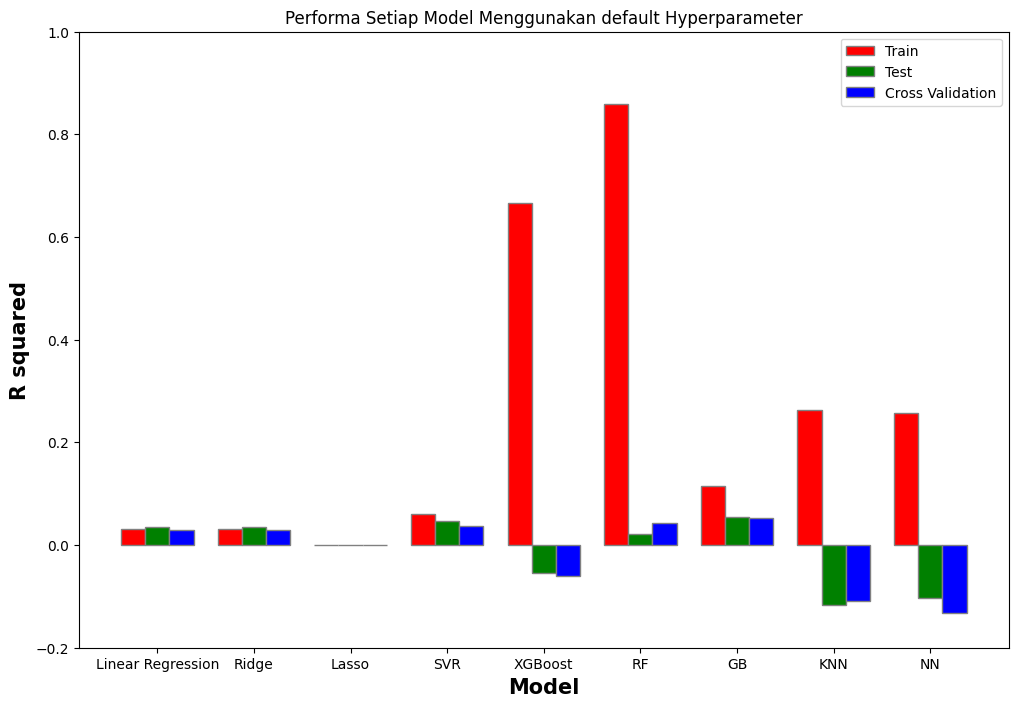

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(test_acc_1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, train_acc_1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Train')
plt.bar(br2, test_acc_1, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test')
plt.bar(br3, cross_acc_1, color ='b', width = barWidth,
        edgecolor ='grey', label ='Cross Validation')

# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('R squared', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(test_acc_1))],
        ['Linear Regression', 'Ridge', 'Lasso', 'SVR', 'XGBoost','RF','GB','KNN','NN'])
plt.title('Performa Setiap Model Menggunakan default Hyperparameter')
plt.ylim(-0.2,1)

plt.legend()
plt.show()

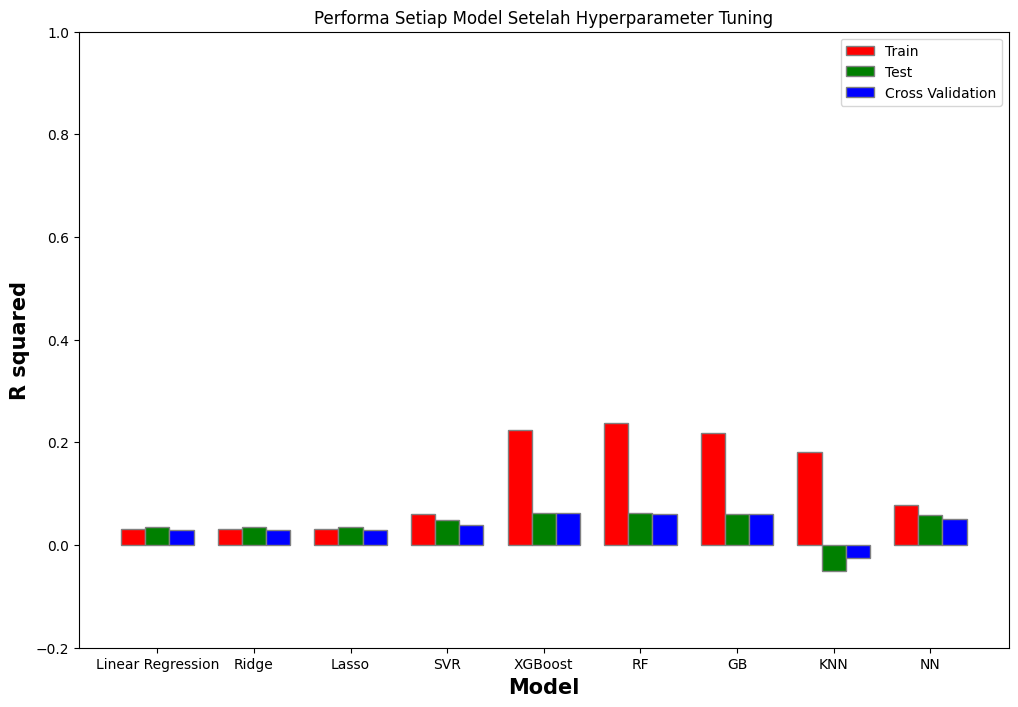

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(test_acc_1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, train_acc_2, color ='r', width = barWidth,
        edgecolor ='grey', label ='Train')
plt.bar(br2, test_acc_2, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test')
plt.bar(br3, cross_acc_2, color ='b', width = barWidth,
        edgecolor ='grey', label ='Cross Validation')

# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('R squared', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(test_acc_1))],
        ['Linear Regression', 'Ridge', 'Lasso', 'SVR', 'XGBoost','RF','GB','KNN','NN'])
plt.title('Performa Setiap Model Setelah Hyperparameter Tuning')
plt.ylim(-0.2,1)

plt.legend()
plt.show()

MLP menjadi model yang terbaik karena memberikan r2 yang tidak terlalu berbeda jauh antara train, test, dan crossvalidationnya.

#Deployment

In [ ]:
from sklearn.pipeline import Pipeline
import pickle
from sklearn.compose import ColumnTransformer

In [ ]:
X_train_md, X_test_md, y_train_md, y_test_md = train_test_split(df.drop(['song_name','song_popularity'], axis='columns'),
                                                    df['song_popularity'],
                                                    test_size = 0.2,
                                                    random_state = 0)

# Transformasi Target (y) Menggunakan Yeo-Johnson
y_transformer = PowerTransformer(method='yeo-johnson')
y_train_transformed = y_transformer.fit_transform(y_train_md.values.reshape(-1, 1))

numerical_columns_position=[]
categorical_columns_position=[]
temp=0

for i in df.drop(['song_name','song_popularity'],axis='columns').columns:
  if i in num_col:
    numerical_columns_position.append(temp)
    temp=temp+1
  else:
    categorical_columns_position.append(temp)
    temp=temp+1


numerical_pipeline = Pipeline(steps=[
    ('yeo-johnson', PowerTransformer(method='yeo-johnson')),  # Yeo-Johnson
    ('scaler', RobustScaler())  # Scaling
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns_position),
        ('cat', RobustScaler(), categorical_columns_position)
    ]
)


model = MLPRegressor(activation= 'relu', alpha= 0.01, hidden_layer_sizes= (100,), learning_rate= 'adaptive', solver= 'sgd', random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Fitting Pipeline
pipeline.fit(X_train_md, y_train_transformed.ravel())


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('yeo-johnson',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  [0, 1, 2, 3, 4, 6, 7, 9, 10,
                                                   12]),
                                                 ('cat', RobustScaler(),
                                                  [5, 8, 11])])),
                ('regressor',
                 MLPRegressor(alpha=0.01, learning_rate='adaptive',
                              random_state=42, solver='sgd'))])

In [ ]:
# Menyimpan Pipeline dan y Transformer Menggunakan Pickle
with open('regression_model_pipeline_with_y.pkl', 'wb') as file:
    pickle.dump({'pipeline': pipeline, 'y_transformer': y_transformer}, file)

# Memuat Pipeline dan y Transformer Kembali
with open('regression_model_pipeline_with_y.pkl', 'rb') as file:
    loaded_objects = pickle.load(file)

loaded_pipeline = loaded_objects['pipeline']
loaded_y_transformer = loaded_objects['y_transformer'] #buat manggil object transformation yang ada di pipeline


# Prediksi train
y_pred_train_1 = loaded_pipeline.predict(X_train_md) #input data yang belum di preprocessing, nanti pipeline akan nge preprocessing secara otomatis
r2 = r2_score(y_train_transformed, y_pred_train_1)
print('r2 score for train data is ', r2)

# Prediksi test
y_pred_test_2 = loaded_pipeline.predict(X_test_md) #input data yang belum di preprocessing, nanti pipeline akan nge preprocessing secara otomatis

y_test_transformed=loaded_y_transformer.transform(y_test_md.values.reshape(-1, 1)) #y_test jangan lupa di transformasi, karena belum di transform (masih dalam betuk raw)

r2 = r2_score(y_test_transformed, y_pred_test_2)
print('r2 score for test data is ', r2)

r2 score for train data is  0.07641083332824972
r2 score for test data is  0.057532918536638666


In [ ]:
# Memuat Pipeline dan y Transformer Kembali
with open('regression_model_pipeline_with_y.pkl', 'rb') as file:
    loaded_objects = pickle.load(file)

loaded_pipeline = loaded_objects['pipeline']
loaded_y_transformer = loaded_objects['y_transformer'] #buat manggil object transformation yang ada di pipeline

# Prediksi Menggunakan Data Baru
y_pred_transformed = loaded_pipeline.predict(X_test_md) #input data yang belum di preprocessing, nanti pipeline akan nge preprocessing secara otomatis
y_pred_actual = loaded_y_transformer.inverse_transform(y_pred_transformed.reshape(-1, 1)) #buat inverse outputnya

##comparison

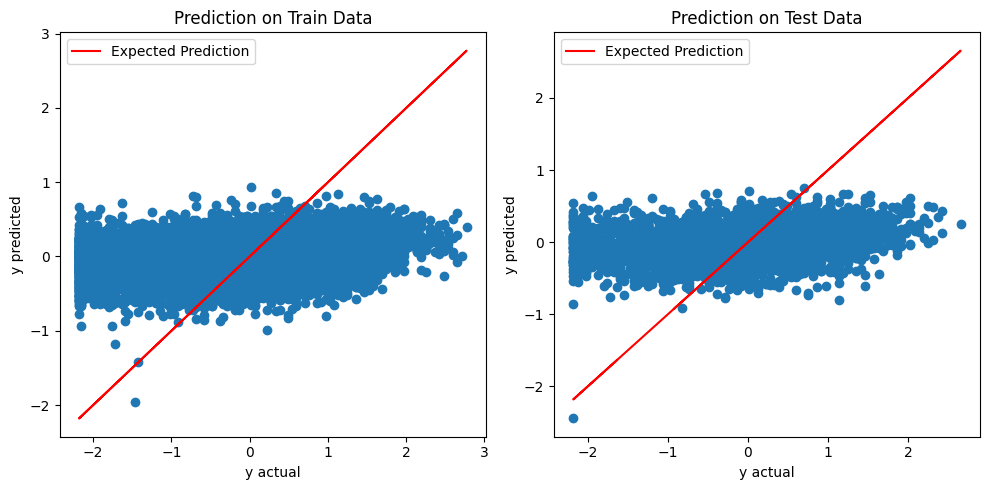

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(y_train.values,(y_pred_train_1.reshape(-1, 1)).ravel())
ax1.plot(y_train.values, y_train.values, label='Expected Prediction', color='Red')
ax1.set_title('Prediction on Train Data')
ax1.set_xlabel('y actual')
ax1.set_ylabel('y predicted')
ax1.legend()


ax2.scatter(y_test.values,(y_pred_test_2.reshape(-1, 1)).ravel())
ax2.plot(y_test.values, y_test.values, label='Expected Prediction', color='Red')
ax2.set_title('Prediction on Test Data')
ax2.set_xlabel('y actual')
ax2.set_ylabel('y predicted')
ax2.legend()


plt.tight_layout()
plt.show()


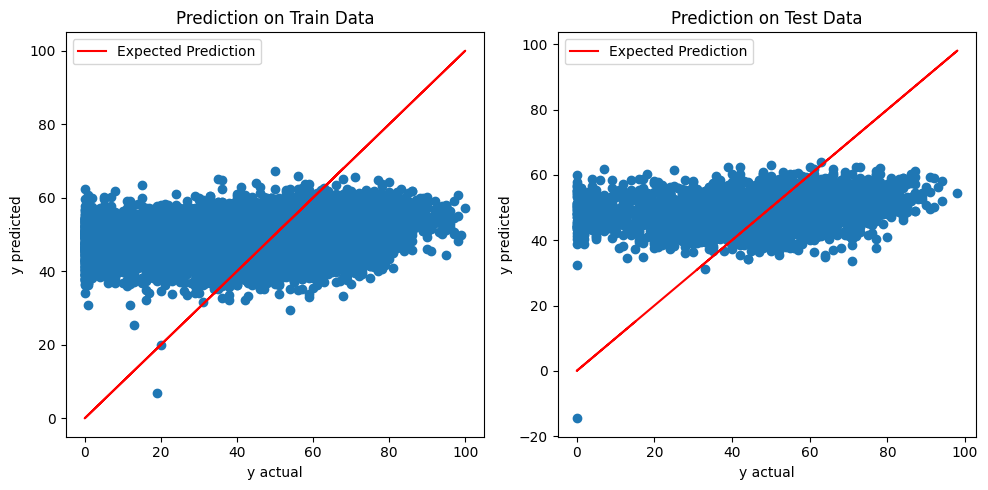

In [ ]:
y_pred_actual = loaded_y_transformer.inverse_transform(y_pred_transformed.reshape(-1, 1)) #buat inverse outputnya


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(y_train_md.values,loaded_y_transformer.inverse_transform(y_pred_train_1.reshape(-1, 1)).ravel())
ax1.plot(y_train_md.values, y_train_md.values, label='Expected Prediction', color='Red')
ax1.set_title('Prediction on Train Data')
ax1.set_xlabel('y actual')
ax1.set_ylabel('y predicted')
ax1.legend()


ax2.scatter(y_test_md.values,loaded_y_transformer.inverse_transform(y_pred_test_2.reshape(-1, 1)).ravel())
ax2.plot(y_test_md.values, y_test_md.values, label='Expected Prediction', color='Red')
ax2.set_title('Prediction on Test Data')
ax2.set_xlabel('y actual')
ax2.set_ylabel('y predicted')
ax2.legend()


plt.tight_layout()
plt.show()


